In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera, durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from linearmodels.iv import IV2SLS
import scipy.stats as stats

In [2]:
data = "boston.csv"

df = pd.read_csv(data)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [3]:
X_orig = df.drop(columns=["MEDV"])
X_orig.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
y_orig = df["MEDV"]
y_orig.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [5]:
# Se dividen los datos en conjuntos de entrenamiento y prueba:
# - `X_train` y `y_train`: características y etiquetas para entrenar el modelo.
# - `X_test` y `y_test`: características y etiquetas para evaluar el modelo.
# `test_size=0.2` indica que el 20% de los datos se utilizarán para pruebas.
# `random_state=42` garantiza que la división sea reproducible.
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)

In [6]:
df_train = pd.concat( [X_train, y_train], axis=1)
df_train.head()

CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD    TAX  \
477  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666.0   
15    0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307.0   
332   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304.0   
423   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666.0   
19    0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965    4  307.0   

     PTRATIO       B  LSTAT  MEDV  
477     20.2  349.48  24.91  12.0  
15      21.0  395.62   8.47  19.9  
332     16.9  362.25   7.83  19.4  
423     20.2    2.52  23.29  13.4  
19      21.0  390.95  11.28  18.2

In [7]:
X_train.isna().sum() + (X_train == "").sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
y_train.isna().sum() + (y_train == "").sum()

0

In [9]:
X_train.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.609125   11.569307   10.985050    0.071782    0.556484    6.315891   
std      8.875058   23.152481    6.894618    0.258447    0.117704    0.709452   
min      0.009060    0.000000    0.740000    0.000000    0.385000    3.863000   
25%      0.081437    0.000000    5.130000    0.000000    0.452000    5.890500   
50%      0.261390    0.000000    8.560000    0.000000    0.538000    6.210000   
75%      3.202962   20.000000   18.100000    0.000000    0.631000    6.636750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    68.556436    3.808195    9.356436  404.032178   18.318317  356.278342   
std     27.994922    2.131226    8.589721  166.172655    2.228701   91.566533   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.550000    2.087875    4.000000  279.000000   16.800000  375.472500   
50%     77.700000    3.175750    5.000000  330.000000   18.700000  391.305000   
75%     93.650000    5.400800   12.000000  666.000000   20.200000  395.755000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.457351  
std      7.110381  
min      1.730000  
25%      6.772500  
50%     10.925000  
75%     16.372500  
max     37.970000

In [10]:
y_train.describe()

count    404.000000
mean      22.796535
std        9.332147
min        5.000000
25%       16.950000
50%       21.600000
75%       26.400000
max       50.000000
Name: MEDV, dtype: float64

In [11]:
df_train.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.198855  0.400198 -0.044589  0.396406 -0.200303  0.334090   
ZN      -0.198855  1.000000 -0.533489 -0.043754 -0.526414  0.274661 -0.575078   
INDUS    0.400198 -0.533489  1.000000  0.095158  0.770957 -0.398690  0.636569   
CHAS    -0.044589 -0.043754  0.095158  1.000000  0.135476  0.111272  0.096016   
NOX      0.396406 -0.526414  0.770957  0.135476  1.000000 -0.299615  0.720417   
RM      -0.200303  0.274661 -0.398690  0.111272 -0.299615  1.000000 -0.210863   
AGE      0.334090 -0.575078  0.636569  0.096016  0.720417 -0.210863  1.000000   
DIS     -0.366487  0.681817 -0.707566 -0.121671 -0.772330  0.198299 -0.756589   
RAD      0.615947 -0.313790  0.588952  0.028685  0.589061 -0.199738  0.430321   
TAX      0.576894 -0.294267  0.702353  0.007746  0.650247 -0.281127  0.471670   
PTRATIO  0.288970 -0.389163  0.348303 -0.113003  0.161253 -0.342643  0.240841   
B       -0.356858  0.178652 -0.363151  0.041666 -0.368034  0.113347 -0.265186   
LSTAT    0.414142 -0.396572  0.603644 -0.070652  0.593862 -0.612577  0.571051   
MEDV    -0.380091  0.309504 -0.470546  0.190642 -0.415768  0.710680 -0.340216   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.366487  0.615947  0.576894  0.288970 -0.356858  0.414142 -0.380091  
ZN       0.681817 -0.313790 -0.294267 -0.389163  0.178652 -0.396572  0.309504  
INDUS   -0.707566  0.588952  0.702353  0.348303 -0.363151  0.603644 -0.470546  
CHAS    -0.121671  0.028685  0.007746 -0.113003  0.041666 -0.070652  0.190642  
NOX     -0.772330  0.589061  0.650247  0.161253 -0.368034  0.593862 -0.415768  
RM       0.198299 -0.199738 -0.281127 -0.342643  0.113347 -0.612577  0.710680  
AGE     -0.756589  0.430321  0.471670  0.240841 -0.265186  0.571051 -0.340216  
DIS      1.000000 -0.483329 -0.523577 -0.217588  0.291122 -0.494921  0.235114  
RAD     -0.483329  1.000000  0.912527  0.472257 -0.439387  0.480301 -0.387467  
TAX     -0.523577  0.912527  1.000000  0.444836 -0.442027  0.530632 -0.459795  
PTRATIO -0.217588  0.472257  0.444836  1.000000 -0.173958  0.360167 -0.491210  
B        0.291122 -0.439387 -0.442027 -0.173958  1.000000 -0.340873  0.339918  
LSTAT   -0.494921  0.480301  0.530632  0.360167 -0.340873  1.000000 -0.736422  
MEDV     0.235114 -0.387467 -0.459795 -0.491210  0.339918 -0.736422  1.000000

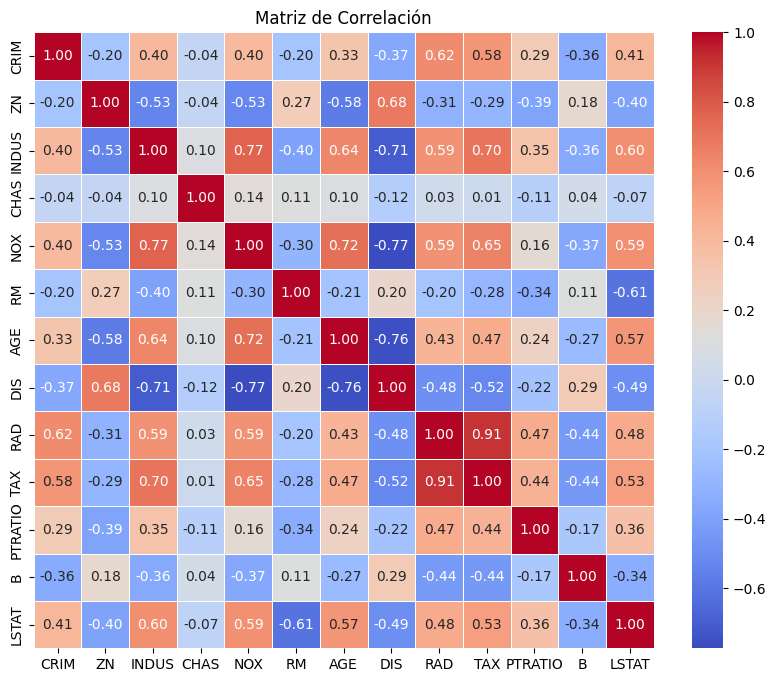

In [12]:
# Asegúrate de que el DataFrame filtrado esté definido como df_train o usa X_train directamente.
correlation_matrix = X_train.corr()

# Grafica el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

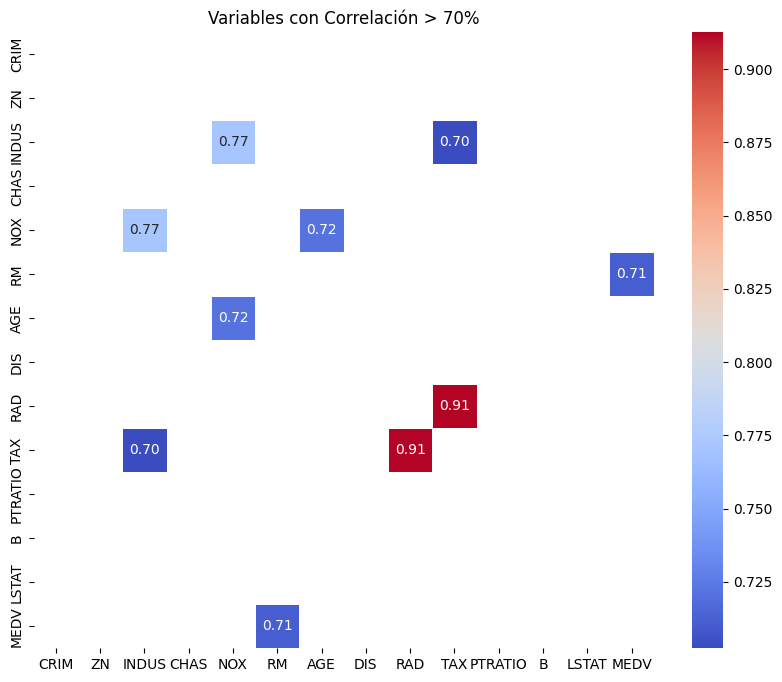

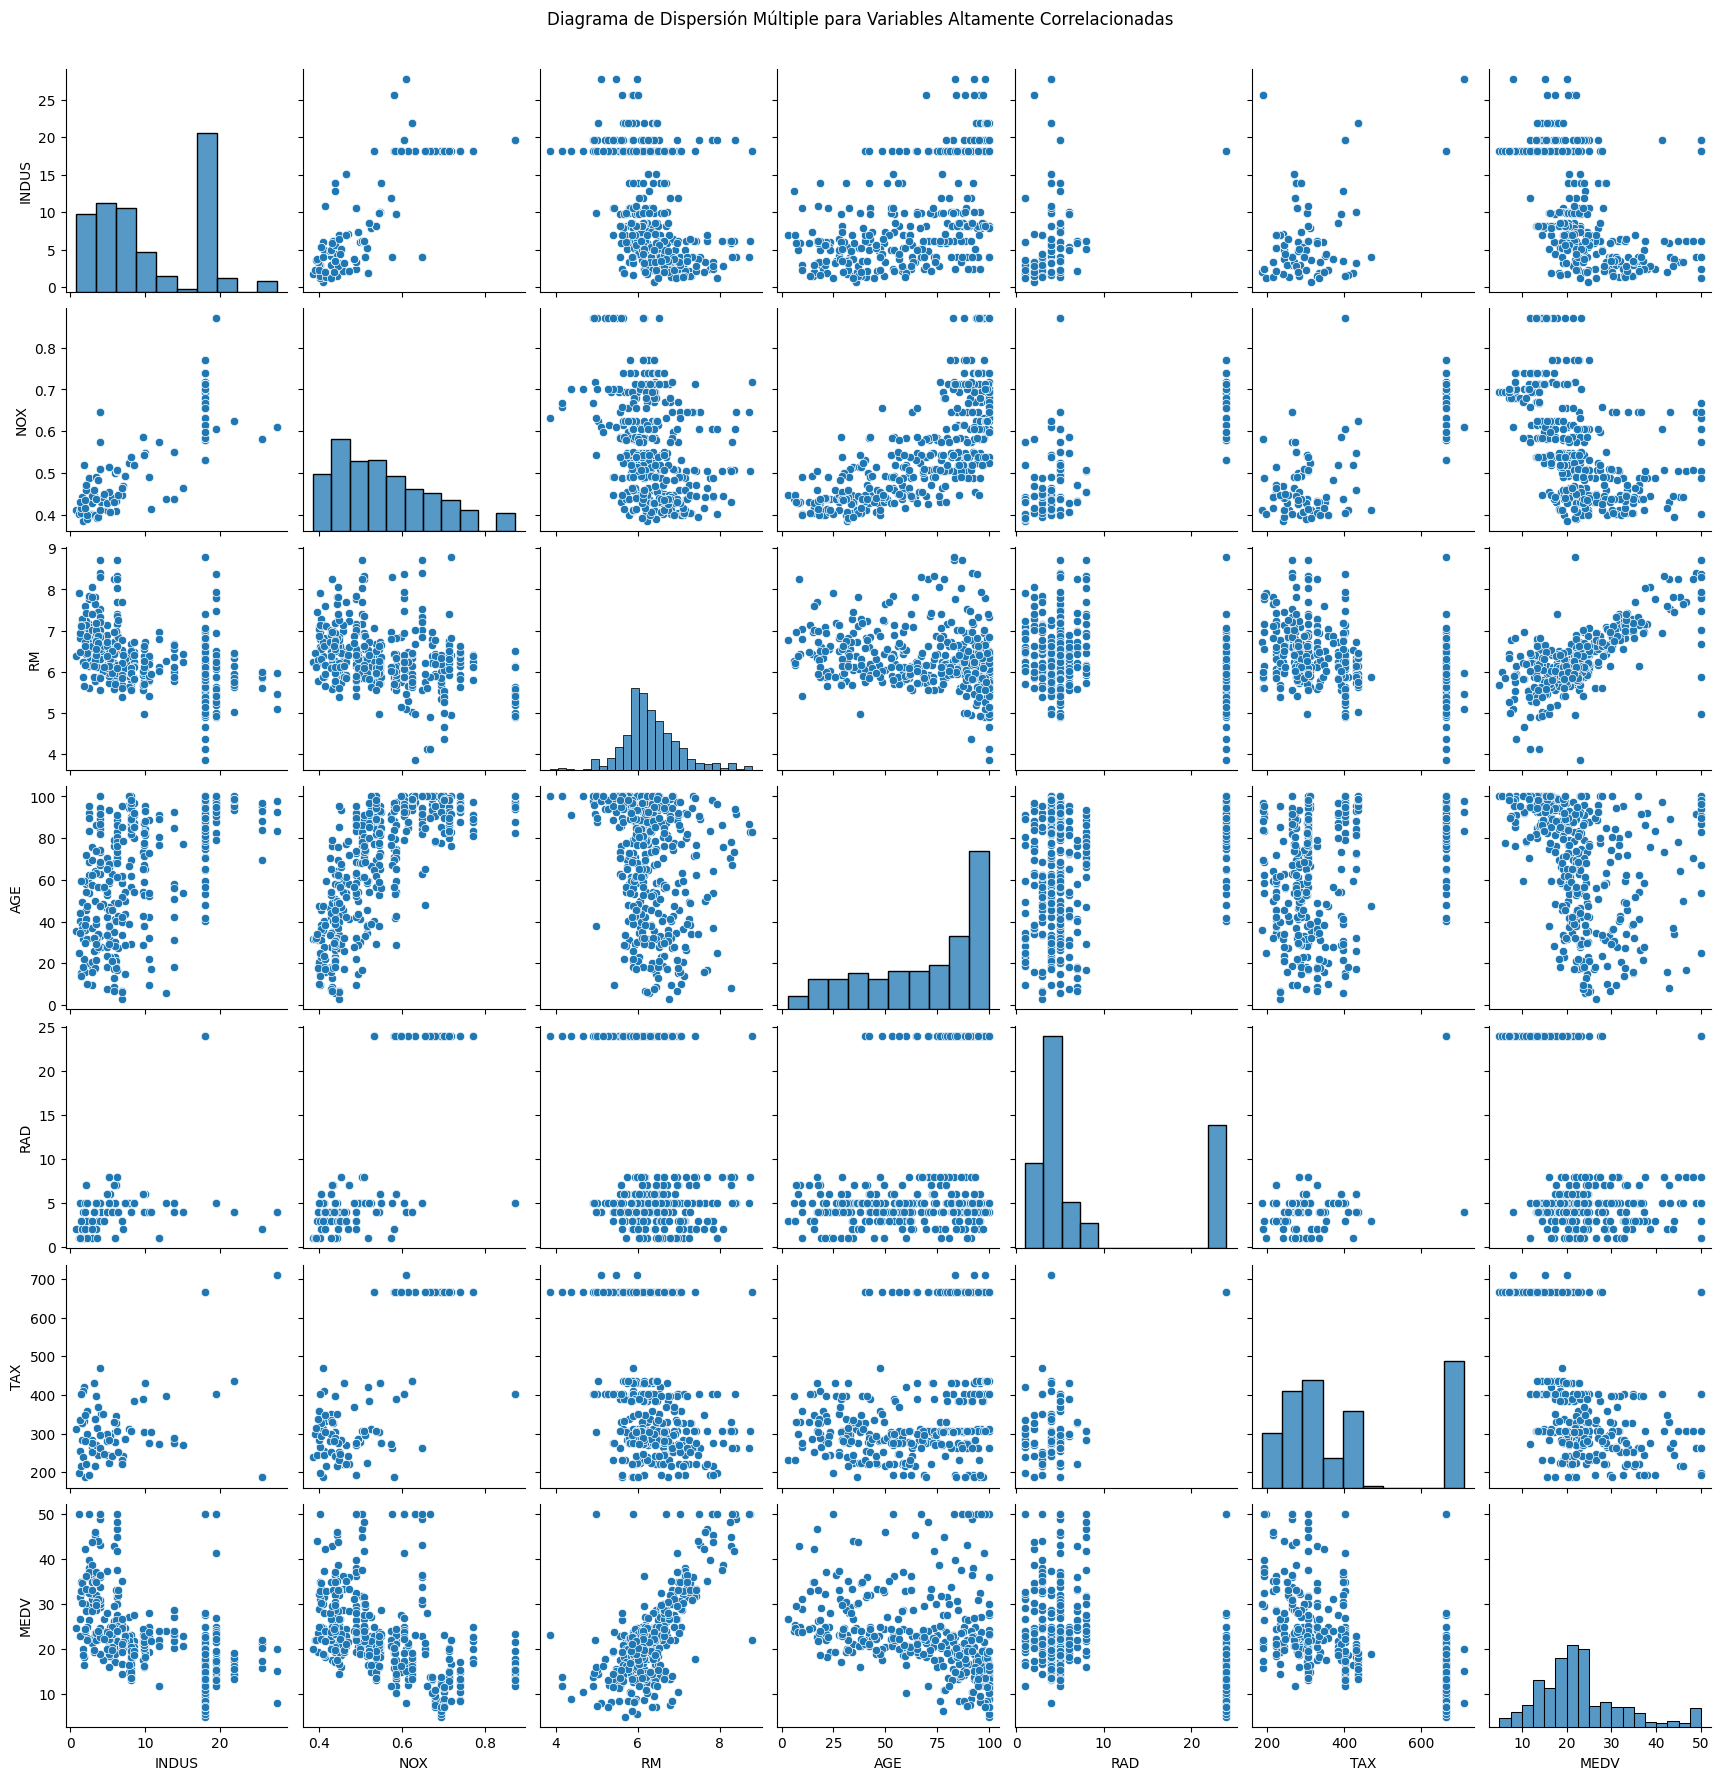

In [13]:
# Calcula la matriz de correlación
correlation_matrix = df_train.corr()

# Filtra las correlaciones mayores al 70% (excepto la diagonal)
high_corr = correlation_matrix[(correlation_matrix >= 0.7) & (correlation_matrix != 1)]

# Grafica el heatmap de las correlaciones filtradas
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=high_corr.isnull())
plt.title("Variables con Correlación > 70%")
plt.show()

# Obtén las columnas con alta correlación
high_corr_cols = high_corr.dropna(how="all", axis=1).columns

# Grafica el diagrama de dispersión múltiple (pairplot) solo con las columnas seleccionadas
sns.pairplot(df_train[high_corr_cols])
plt.suptitle("Diagrama de Dispersión Múltiple para Variables Altamente Correlacionadas", y=1.02)
plt.show()


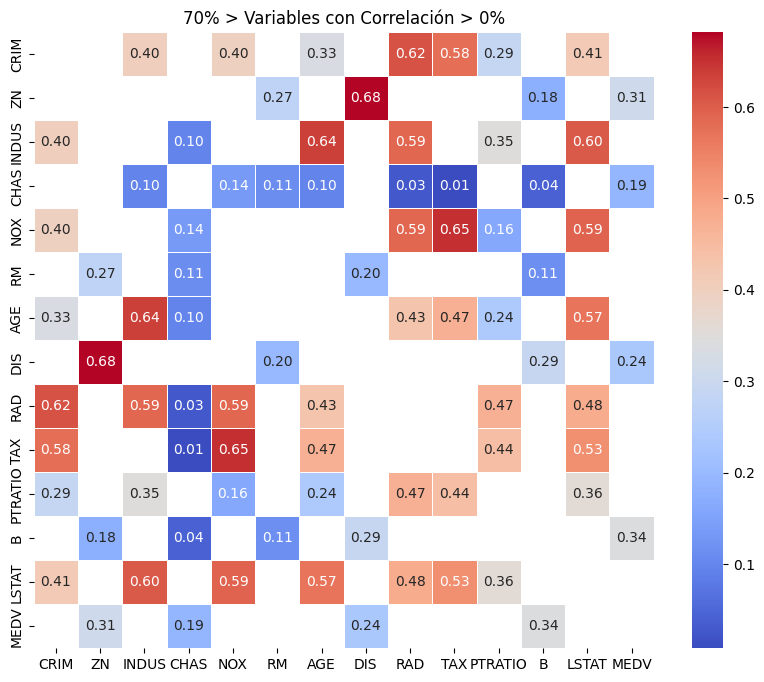

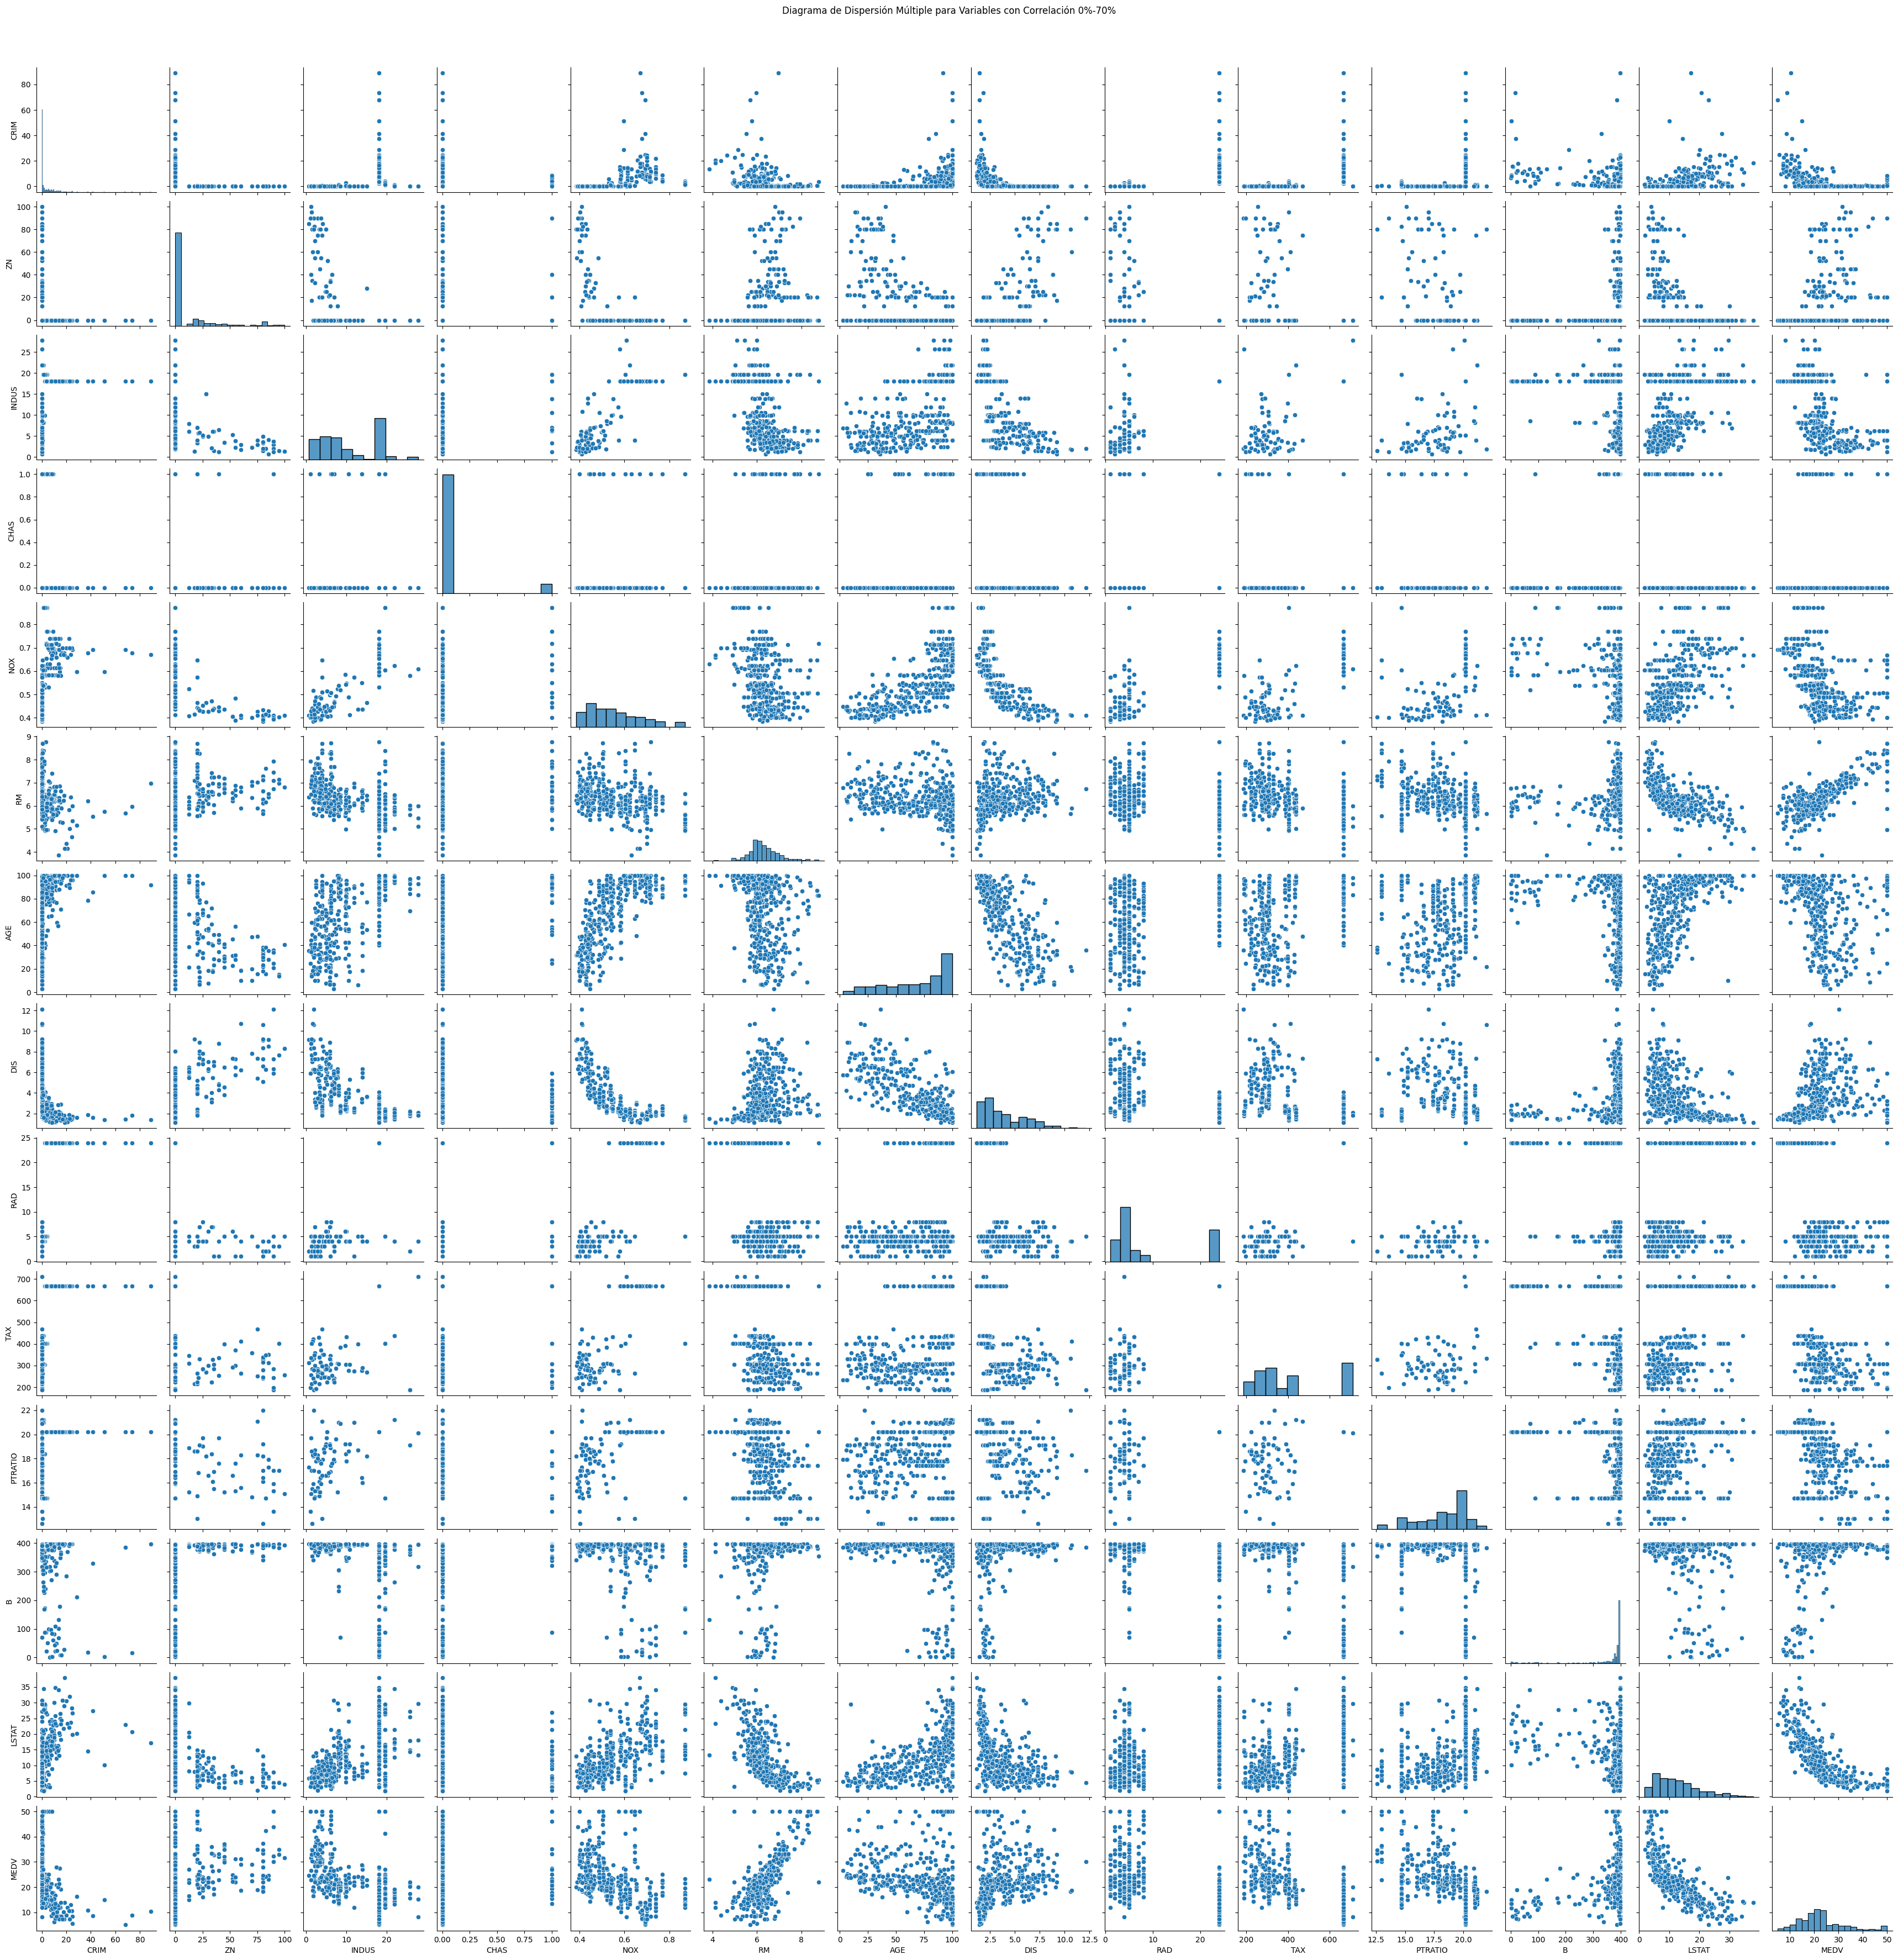

In [14]:
# Calcula la matriz de correlación
correlation_matrix = df_train.corr()

# Filtra las correlaciones entre 0% y 70% (excepto la diagonal)
low_corr = correlation_matrix[(correlation_matrix < 0.7) & (correlation_matrix >= 0) & (correlation_matrix != 1)]

# Grafica el heatmap de las correlaciones filtradas
plt.figure(figsize=(10, 8))
sns.heatmap(low_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=low_corr.isnull())
plt.title("70% > Variables con Correlación > 0%")
plt.show()

# Obtén las columnas con correlaciones bajas pero positivas
low_corr_cols = low_corr.dropna(how="all", axis=1).columns

# Grafica el diagrama de dispersión múltiple (pairplot) solo con las columnas seleccionadas
sns.pairplot(df_train[low_corr_cols])
plt.suptitle("Diagrama de Dispersión Múltiple para Variables con Correlación 0%-70%", y=1.02)
plt.show()


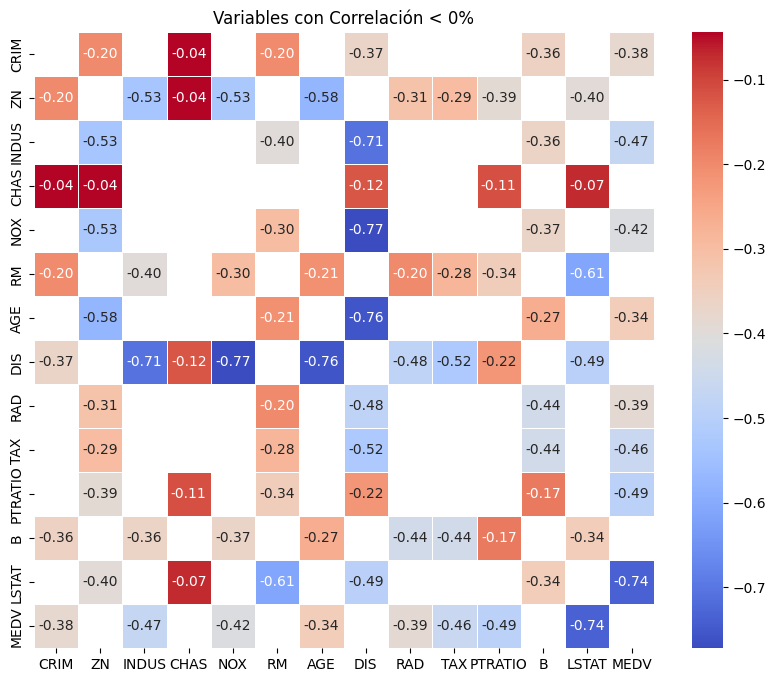

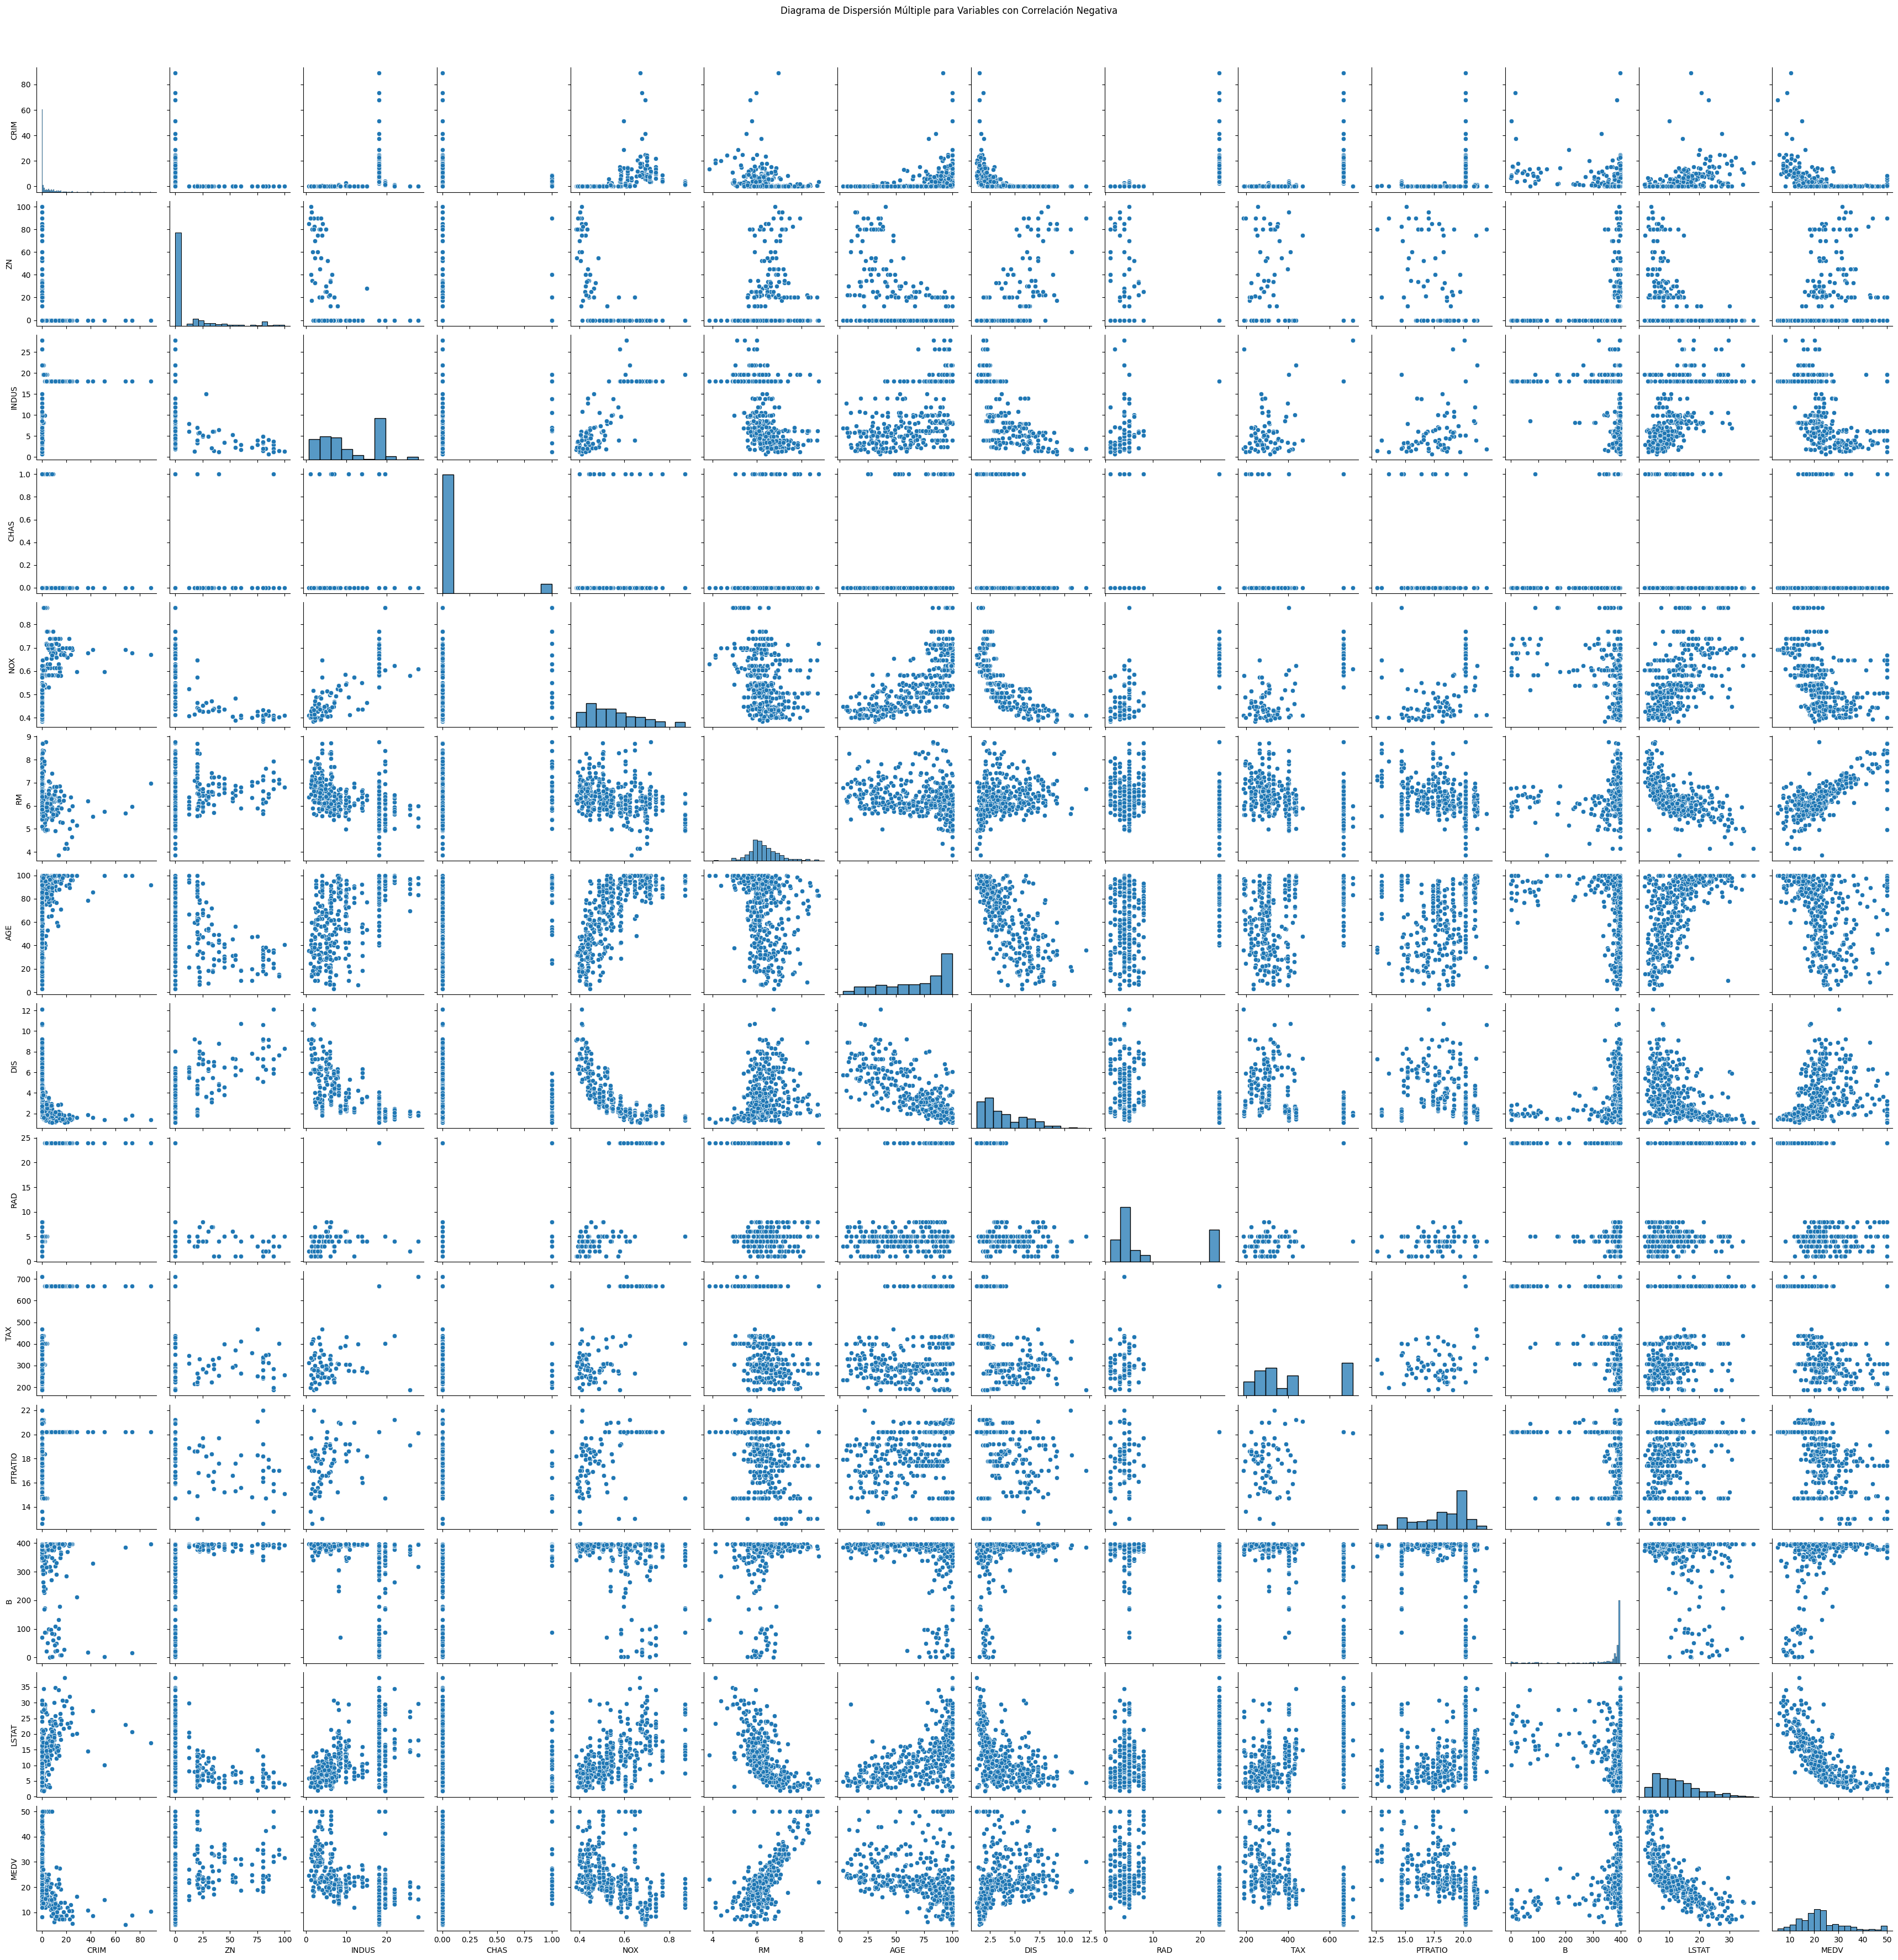

In [15]:
# Calcula la matriz de correlación
correlation_matrix = df_train.corr()

# Filtra las correlaciones negativas (menos de 0%)
negative_corr = correlation_matrix[(correlation_matrix < 0) & (correlation_matrix != 1)]

# Grafica el heatmap de las correlaciones negativas
plt.figure(figsize=(10, 8))
sns.heatmap(negative_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=negative_corr.isnull())
plt.title("Variables con Correlación < 0%")
plt.show()

# Obtén las columnas con correlaciones negativas
negative_corr_cols = negative_corr.dropna(how="all", axis=1).columns

# Grafica el diagrama de dispersión múltiple (pairplot) solo con las columnas seleccionadas
sns.pairplot(df_train[negative_corr_cols])
plt.suptitle("Diagrama de Dispersión Múltiple para Variables con Correlación Negativa", y=1.02)
plt.show()


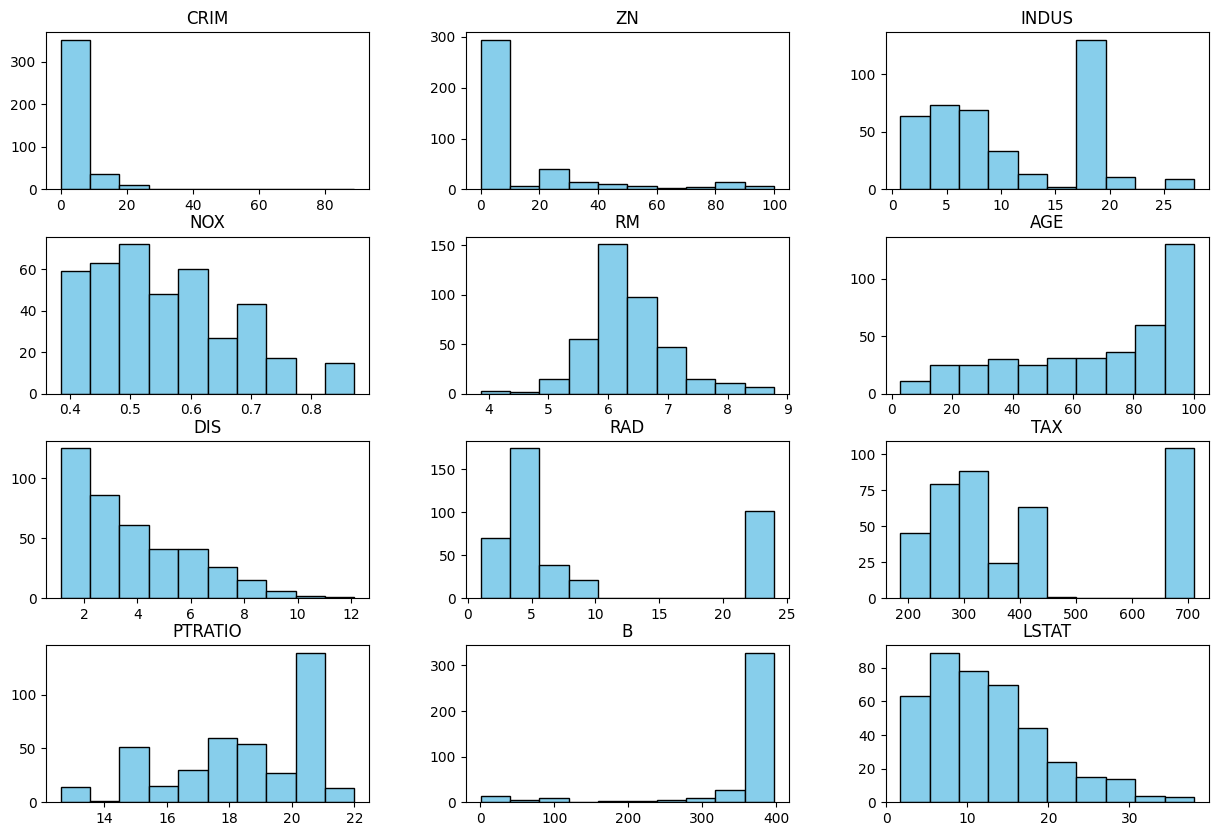

In [16]:
df_train.drop(['CHAS', 'MEDV'], axis=1).hist(figsize=(15, 10), layout=(4,3), grid=False, color='skyblue', edgecolor='black')
plt.show()

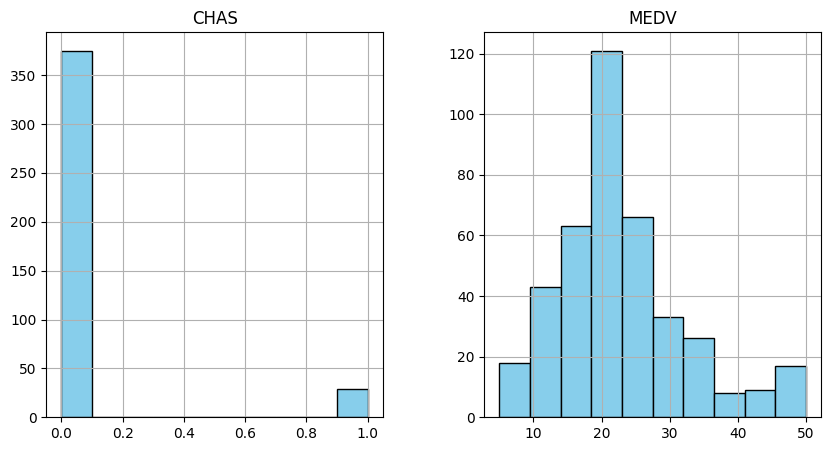

In [17]:
# Selecciona solo las columnas CHAS y MEDV
df_train[['CHAS', 'MEDV']].hist(figsize=(10, 5), layout=(1, 2), grid=True, color='skyblue', edgecolor='black')
plt.show()

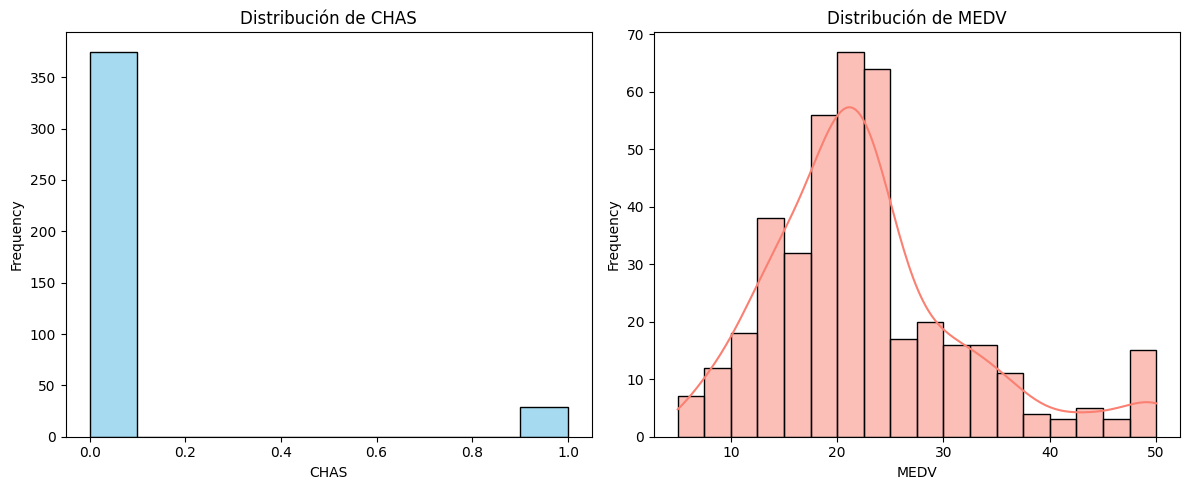

In [18]:
# Configura el tamaño de la figura y crea los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma con curva KDE para la columna CHAS
sns.histplot(df_train['CHAS'], kde=False, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de CHAS')
axes[0].set_xlabel('CHAS')
axes[0].set_ylabel('Frequency')

# Histograma con curva KDE para la columna MEDV
sns.histplot(df_train['MEDV'], kde=True, ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Distribución de MEDV')
axes[1].set_xlabel('MEDV')
axes[1].set_ylabel('Frequency')

# Ajusta el diseño
plt.tight_layout()

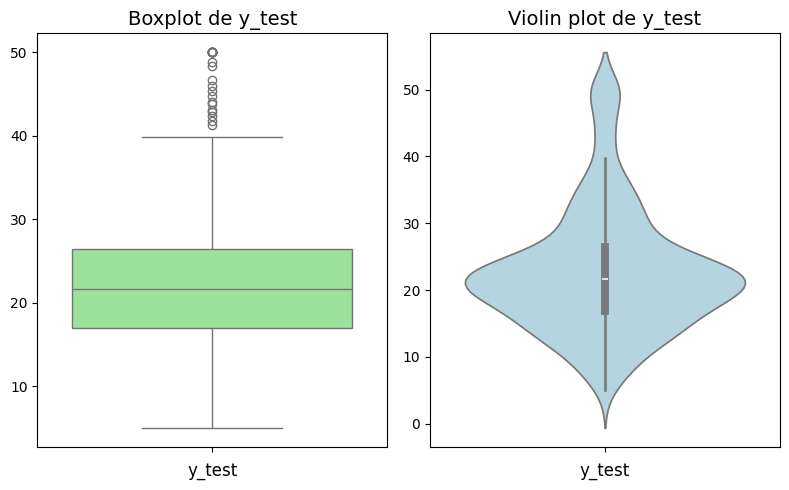

In [19]:
plt.figure(figsize=(8, 5))  # Configuración del tamaño del gráfico

# 1. Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=y_train, color='lightgreen')
plt.title('Boxplot de y_test', fontsize=14)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('')

# 2. Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(y=y_train, color='lightblue')
plt.title('Violin plot de y_test', fontsize=14)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('')

plt.tight_layout()  # Ajusta los gráficos para que no se superpongan
plt.show()

In [20]:
X_constant = sm.add_constant(X_train)

lin_reg = sm.OLS(y_train, X_constant).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          6.21e-109
Time:                        13:05:09   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2468      5.677      5.328      0.000      19.086      41.408
CRIM          -0.1131      0.035     -3.250      0.001      -0.181      -0.045
ZN             0.0301      0.016      1.882      0.061      -0.001       0.062
INDUS          0.0404      0.067      0.599      0.549      -0.092       0.173
CHAS           2.7844      0.956      2.914      0.004       0.905       4.663
NOX          -17.2026      4.236     -4.061      0.000     -25.531      -8.874
RM             4.4388      0.464      9.567      0.000       3.527       5.351
AGE           -0.0063      0.015     -0.432      0.666      -0.035       0.022
DIS           -1.4479      0.226     -6.408      0.000      -1.892      -1.004
RAD            0.2624      0.076      3.454      0.001       0.113       0.412
TAX           -0.0106      0.004     -2.508      0.013      -0.019      -0.002
PTRATIO       -0.9155      0.144     -6.357      0.000      -1.199      -0.632
B              0.0124      0.003      4.166      0.000       0.007       0.018
LSTAT         -0.5086      0.056     -9.133      0.000      -0.618      -0.399
==============================================================================
Omnibus:                      133.052   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.817
Skew:                           1.379   Prob(JB):                    1.24e-126
Kurtosis:                       8.181   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Exportar el resumen a un archivo de texto
with open("lin_reg_summary.txt", "w") as f:
    f.write(lin_reg.summary().as_text())


**Análisis Detallado de Resultados de Regresión OLS**

---

### **Introducción**
Este documento proporciona una explicación detallada de los resultados obtenidos de un modelo de regresión múltiple ajustado mediante el método de mínimos cuadrados ordinarios (OLS). El objetivo es entender el significado de las métricas reportadas, evaluar la calidad del modelo y proponer conclusiones y sugerencias.

---

### **1. Variables Dependiente e Independientes**
- **Variable Dependiente (MEDV):** Representa el valor medio de las viviendas en un conjunto de datos.
- **Variables Independientes:** 13 variables predictoras que explican la variabilidad en MEDV.

---

### **2. Resultados Clave**

#### **2.1. R-squared: 0.751**
- **Definición:** El coeficiente de determinación indica que el 75.1% de la variabilidad en la variable dependiente (MEDV) es explicada por las variables independientes incluidas en el modelo.
- **Interpretación:** Un valor de 0.751 sugiere un buen ajuste del modelo. Aunque no explica el 100% de la variabilidad, es un resultado fuerte para datos observacionales.

#### **2.2. Adj. R-squared: 0.743**
- **Definición:** La versión ajustada del R-squared penaliza la inclusión de variables irrelevantes.
- **Interpretación:** La reducción ligera respecto al R-squared (de 0.751 a 0.743) indica que las 13 variables contribuyen de manera razonable al modelo sin introducir ruido significativo.

#### **2.3. F-statistic: 90.43**
- **Definición:** Evalúa si el modelo en su conjunto es significativo al contrastar la hipótesis nula de que todos los coeficientes de las variables independientes son cero.
- **Interpretación:** Un F-statistic de 90.43 es un valor alto, lo que indica que el modelo general es estadísticamente significativo.

#### **2.4. Prob (F-statistic): 6.21e-109**
- **Definición:** Valor p asociado al F-statistic. Indica la probabilidad de obtener un F tan alto si la hipótesis nula fuera verdadera.
- **Interpretación:** El valor extremadamente bajo (6.21e-109) confirma que el modelo es significativo y que al menos una variable independiente tiene relación con MEDV.

#### **2.5. Df Residuals: 390**
- **Definición:** Grados de libertad restantes después de ajustar el modelo.
- **Cálculo:**
  \[ \text{Df Residuals} = n - k - 1 = 404 - 13 - 1 = 390 \]
- **Interpretación:** El modelo tiene suficientes datos para garantizar estimaciones confiables.

#### **2.6. Log-Likelihood: -1194.3**
- **Definición:** Mide la probabilidad de observar los datos dados los parámetros ajustados.
- **Interpretación:** Un valor negativo es esperable. Comparaciones con otros modelos serían más útiles para evaluar mejoras.

#### **2.7. AIC: 2417**
- **Definición:** Akaike Information Criterion penaliza tanto la falta de ajuste como la complejidad del modelo.
- **Interpretación:** Un AIC de 2417 puede servir como referencia para comparar este modelo con otros, siendo deseable un valor menor.

#### **2.8. BIC: 2473**
- **Definición:** Bayes Information Criterion, similar al AIC, pero penaliza más severamente la complejidad del modelo.
- **Interpretación:** Al igual que el AIC, valores menores son preferibles para modelos comparables.

---

### **3. Conclusiones**
1. **Significancia del Modelo:** El modelo es estadísticamente significativo ( Prob (F-statistic): 6.21e-109) y explica una gran proporción de la variabilidad en los valores medios de las viviendas (R-squared: 0.751).
2. **Contribución de las Variables:** Todas las variables en conjunto contribuyen de manera razonable al modelo, dado que el Adj. R-squared es cercano al R-squared.
3. **Suficiencia de Datos:** El modelo cuenta con suficientes grados de libertad (Df Residuals: 390) para producir estimaciones confiables.

---

### **4. Sugerencias**
1. **Evaluar Coeficientes Individuales:** Analizar los valores p de los coeficientes de cada variable independiente para identificar cuáles tienen un impacto significativo. Variables con valores p altos (≥ 0.05) podrían eliminarse para simplificar el modelo.
2. **Validar Suposiciones del Modelo:** Verificar las suposiciones del modelo OLS, como:
   - Linealidad.
   - Normalidad de los residuos.
   - Homocedasticidad.
3. **Comparar con Otros Modelos:** Probar modelos alternativos utilizando transformaciones de variables o técnicas como regresión Ridge o Lasso. Comparar sus AIC/BIC con los resultados actuales.
4. **Aplicar Validación Cruzada:** Dividir los datos en conjuntos de entrenamiento y prueba para evaluar la capacidad predictiva del modelo y prevenir sobreajuste.
5. **Explorar Variables Adicionales:** Si es posible, incluir nuevas variables predictoras que puedan capturar aspectos no explicados actualmente.

-------------------------
-------------------------

### **Resultados de los Coeficientes del Modelo**

A continuación, se presenta un análisis detallado de los coeficientes y las estadísticas reportadas para cada variable independiente en el modelo de regresión OLS.

---

### **1. Coeficientes y su Interpretación**
Cada coeficiente refleja el cambio esperado en la variable dependiente (MEDV) dado un cambio unitario en la variable independiente correspondiente, manteniendo constantes las demás variables.

#### **1.1. Constante (const): 30.2468**
- **Interpretación:** Cuando todas las variables independientes tienen un valor de cero, el valor esperado de MEDV es 30.2468.
- **Significancia:** Altamente significativa (\(p = 0.000\)).

#### **1.2. CRIM: -0.1131**
- **Interpretación:** Por cada unidad adicional en la tasa de criminalidad per cápita (CRIM), el valor de MEDV disminuye en 0.1131 unidades, manteniendo constantes las demás variables.
- **Significancia:** Altamente significativa (\(p = 0.001\)). Esto indica que CRIM tiene un impacto negativo y relevante en el valor de las viviendas.

#### **1.3. ZN: 0.0301**
- **Interpretación:** Por cada unidad adicional en la proporción de terrenos residenciales para lotes mayores de 25,000 pies cuadrados, MEDV aumenta en 0.0301 unidades.
- **Significancia:** Marginal (\(p = 0.061\)), lo que sugiere que su efecto podría no ser estadísticamente significativo en algunos contextos.

#### **1.4. INDUS: 0.0404**
- **Interpretación:** Por cada unidad adicional en la proporción de acres no comerciales por población, MEDV aumenta ligeramente en 0.0404 unidades.
- **Significancia:** No significativa (\(p = 0.549\)).

#### **1.5. CHAS: 2.7844**
- **Interpretación:** Las propiedades adyacentes al río Charles tienen un valor promedio de MEDV 2.7844 unidades más alto en comparación con aquellas que no lo están.
- **Significancia:** Altamente significativa (\(p = 0.004\)).

#### **1.6. NOX: -17.2026**
- **Interpretación:** Un incremento unitario en la concentración de óxidos de nitrógeno (NOX) reduce MEDV en 17.2026 unidades.
- **Significancia:** Altamente significativa (\(p = 0.000\)). Este es uno de los efectos negativos más fuertes en el modelo.

#### **1.7. RM: 4.4388**
- **Interpretación:** Por cada habitación adicional promedio, MEDV aumenta en 4.4388 unidades.
- **Significancia:** Altamente significativa (\(p = 0.000\)). Esta variable tiene un impacto positivo importante.

#### **1.8. AGE: -0.0063**
- **Interpretación:** Un incremento del 1% en la proporción de unidades construidas antes de 1940 reduce MEDV en 0.0063 unidades.
- **Significancia:** No significativa (\(p = 0.666\)).

#### **1.9. DIS: -1.4479**
- **Interpretación:** Un incremento unitario en la distancia a los cinco centros de empleo más cercanos reduce MEDV en 1.4479 unidades.
- **Significancia:** Altamente significativa (\(p = 0.000\)).

#### **1.10. RAD: 0.2624**
- **Interpretación:** Cada incremento unitario en el índice de accesibilidad radial incrementa MEDV en 0.2624 unidades.
- **Significancia:** Altamente significativa (\(p = 0.001\)).

#### **1.11. TAX: -0.0106**
- **Interpretación:** Un incremento unitario en la tasa de impuestos sobre bienes inmuebles por $10,000 reduce MEDV en 0.0106 unidades.
- **Significancia:** Significativa (\(p = 0.013\)).

#### **1.12. PTRATIO: -0.9155**
- **Interpretación:** Un incremento unitario en la proporción de estudiantes por maestro reduce MEDV en 0.9155 unidades.
- **Significancia:** Altamente significativa (\(p = 0.000\)).

#### **1.13. B: 0.0124**
- **Interpretación:** Por cada incremento unitario en la variable “B”, que mide la proporción de residentes afroamericanos, MEDV aumenta en 0.0124 unidades.
- **Significancia:** Altamente significativa (\(p = 0.000\)).

#### **1.14. LSTAT: -0.5086**
- **Interpretación:** Por cada incremento del 1% en el porcentaje de residentes de bajo estatus socioeconómico, MEDV disminuye en 0.5086 unidades.
- **Significancia:** Altamente significativa (\(p = 0.000\)). Este es uno de los efectos negativos más fuertes en el modelo.

---

### **2. Estadísticas de Diagnóstico**

#### **2.1. Omnibus: 133.052**
- **Definición:** Prueba para verificar la normalidad de los residuos.
- **Interpretación:** Un valor p asociado de 0.000 indica que los residuos no son perfectamente normales.

#### **2.2. Durbin-Watson: 2.114**
- **Definición:** Mide la autocorrelación de los residuos.
- **Interpretación:** Un valor cercano a 2 sugiere poca o ninguna autocorrelación.

#### **2.3. Jarque-Bera (JB): 579.817**
- **Definición:** Otra prueba de normalidad de los residuos.
- **Interpretación:** El alto valor de JB y el p-valor bajo (\(1.24e-126\)) confirman que los residuos no son normales.

#### **2.4. Skew: 1.379**
- **Definición:** Mide la asimetría de los residuos.
- **Interpretación:** Un valor positivo indica asimetría hacia la derecha.

#### **2.5. Kurtosis: 8.181**
- **Definición:** Mide la curtosis de los residuos.
- **Interpretación:** Un valor mayor a 3 indica una distribución leptocúrtica (picos pronunciados).

#### **2.6. Cond. No.: 1.49e+04**
- **Definición:** Indica el nivel de multicolinealidad en el modelo.
- **Interpretación:** Un valor elevado sugiere potencial multicolinealidad, lo que podría afectar la estabilidad de los coeficientes.

---

### **3. Conclusiones y Sugerencias**

1. **Variables Significativas:** Variables como CRIM, CHAS, NOX, RM, DIS, RAD, TAX, PTRATIO, B y LSTAT son altamente significativas y tienen un impacto relevante en el valor de las viviendas.
2. **Variables No Significativas:** INDUS, ZN y AGE no muestran una relación significativa con MEDV y podrían evaluarse para su eliminación.
3. **Problemas Detectados:**
   - La no normalidad de los residuos (Omnibus y Jarque-Bera) podría indicar que el modelo no capta completamente la estructura de los datos.
   - El Cond. No. alto sugiere multicolinealidad, que podría requerir una revisión más profunda (e.g., usando regresión Ridge o Lasso).
4. **Recomendaciones:**
   - Transformar variables o explorar modelos no lineales para abordar la no normalidad de los residuos.
   - Verificar y mitigar la multicolinealidad mediante técnicas como PCA o eliminación de variables redundantes.
   - Realizar validación cruzada para confirmar la estabilidad del modelo.

-------------------------
-------------------------

### **Análisis de Estadísticas de Diagnóstico**

---

#### **1. Omnibus: 133.052**
- **Definición:** Es una prueba de bondad de ajuste que evalúa si los residuos del modelo siguen una distribución normal. Combina las medidas de asimetría (Skewness) y curtosis (Kurtosis).
- **Interpretación:**
  - El valor p asociado es \(0.000\), lo que indica que los residuos no siguen una distribución normal.
  - Esto podría sugerir que el modelo no capta completamente la estructura de los datos, o que existen valores atípicos que afectan la distribución de los residuos.

---

#### **2. Durbin-Watson: 2.114**
- **Definición:** Mide la autocorrelación de los residuos en una regresión. Valores cercanos a 2 indican poca o ninguna autocorrelación.
- **Interpretación:**
  - Un valor de \(2.114\) está muy cerca de \(2\), lo que sugiere que los residuos no están correlacionados.
  - Esto es positivo, ya que la ausencia de autocorrelación significa que el modelo captura adecuadamente la independencia de los errores.

---

#### **3. Jarque-Bera (JB): 579.817**
- **Definición:** Es una prueba estadística que evalúa si los residuos tienen una distribución normal, basada en medidas de asimetría (Skewness) y curtosis (Kurtosis).
- **Interpretación:**
  - El valor p asociado es \(1.24e-126\), extremadamente bajo, lo que confirma que los residuos no son normales.
  - Esto concuerda con el resultado de la prueba Omnibus, reforzando la necesidad de revisar la normalidad de los residuos.

---

#### **4. Skew: 1.379**
- **Definición:** Mide la asimetría de la distribución de los residuos. Valores positivos indican que la distribución tiene una cola más larga a la derecha.
- **Interpretación:**
  - Un valor de \(1.379\) indica que los residuos tienen una asimetría hacia la derecha.
  - Esto sugiere que hay más valores extremos altos en los residuos, lo que puede ser un indicador de valores atípicos o una posible transformación necesaria en las variables.

---

#### **5. Kurtosis: 8.181**
- **Definición:** Mide el grado de "pico" o concentración de valores en la distribución de los residuos. Una kurtosis mayor a \(3\) indica una distribución leptocúrtica (picos pronunciados y colas largas).
- **Interpretación:**
  - El valor de \(8.181\) confirma una distribución con picos muy pronunciados y colas largas.
  - Esto refuerza la idea de que los residuos no son normales y puede requerir transformaciones o ajustes en el modelo.

---

#### **6. Cond. No. (Número de Condición): 1.49e+04**
- **Definición:** Es una medida de la multicolinealidad en el modelo. Valores altos (por ejemplo, \(>1000\)) sugieren que algunas variables independientes están altamente correlacionadas.
- **Interpretación:**
  - Un valor de \(1.49e+04\) es extremadamente alto, indicando que existe multicolinealidad severa.
  - La multicolinealidad puede hacer que los coeficientes estimados sean inestables y dificulta la interpretación del modelo.

---

### **Conclusiones y Recomendaciones**

1. **No Normalidad de los Residuos:**
   - Las pruebas Omnibus y Jarque-Bera confirman que los residuos no son normales.
   - **Sugerencias:**
     - Transformar las variables independientes (e.g., logaritmos o raíces cuadradas) para abordar la no normalidad.
     - Considerar un modelo robusto o no paramétrico que no dependa tanto de la normalidad de los residuos.

2. **Multicolinealidad:**
   - El número de condición sugiere una fuerte correlación entre algunas variables independientes.
   - **Sugerencias:**
     - Utilizar técnicas como Análisis de Componentes Principales (PCA) para reducir la dimensionalidad.
     - Implementar regularización mediante regresión Ridge o Lasso.

3. **Independencia de los Residuos:**
   - El valor Durbin-Watson cercano a 2 indica que no hay autocorrelación significativa.
   - **Sugerencia:** No es necesario realizar cambios en este aspecto.

4. **Valores Atípicos y Colas Largas:**
   - Los valores altos de Skew y Kurtosis sugieren la presencia de valores extremos en los datos.
   - **Sugerencias:**
     - Identificar y manejar los valores atípicos, ya sea eliminándolos o transformándolos.
     - Verificar la robustez del modelo ante estos valores extremos.

----------------------------------
----------------------------------

# Model assumptions (suposiciones del modelo)

Las **model assumptions** (suposiciones del modelo) son un conjunto de condiciones o reglas que deben cumplirse para que los resultados e inferencias de un modelo estadístico (como la regresión lineal) sean válidos y confiables. Estas suposiciones aseguran que el modelo está correctamente especificado y que las estimaciones de los coeficientes, así como las pruebas de significancia, son precisas.

En el caso de la **regresión lineal**, las suposiciones más importantes son las siguientes:

---

### **1. Linealidad**
- **Descripción:** La relación entre las variables independientes (predictoras) y la variable dependiente debe ser lineal.
- **Implicación:** Si la relación no es lineal, el modelo no representará adecuadamente los datos y las predicciones serán inexactas.
- **Cómo verificarlo:** 
  - Graficar los residuos contra las predicciones (se espera un patrón aleatorio).
  - Usar transformaciones (e.g., logaritmos) si no se cumple.

In [22]:
resid_val = lin_reg.resid
# Este comando intenta acceder a los residuos (la diferencia entre los valores reales y las predicciones) del modelo ajustado.
# Sin embargo, la clase LinearRegression de sklearn no tiene el atributo 'resid' directamente.
# Esto solo funcionaría si se estuviera usando otro paquete como statsmodels.
# En sklearn, para obtener los residuos, se deben calcular manualmente.

fitted_val = lin_reg.predict()
# Este comando utiliza el modelo ajustado ('lin_reg') para hacer predicciones sobre las variables independientes de entrada.
# El resultado es un vector de predicciones (valores ajustados) basado en el modelo de regresión lineal entrenado.

# lin_reg.resid.mean()
# Este comando intenta calcular la media de los residuos, lo que indica si el modelo tiene algún sesgo.
# La media de los residuos debe ser cerca de cero si el modelo es adecuado.
# Pero, como mencioné antes, el atributo 'resid' no está disponible en sklearn.
# Para obtener los residuos en sklearn, se debe restar las predicciones de los valores reales, como se mostró en el código anterior.

El valor -5.49527420267929e-14 es casi cero. Esto significa que, en promedio, las predicciones de tu modelo no se desvían de los valores reales. En otras palabras, el modelo no tiene un sesgo sistemático hacia valores más altos o más bajos.

En un modelo de regresión lineal, los residuos son las diferencias entre las predicciones del modelo y los valores reales. Idealmente, la media de estos residuos debería ser cero, lo que indica que el modelo no está cometiendo un error promedio, ni sobreestimando ni subestimando los resultados.

Aunque el valor que obtenemos no es exactamente cero, está tan cerca de cero que podemos decir que el modelo está funcionando de manera equilibrada, sin un sesgo importante.

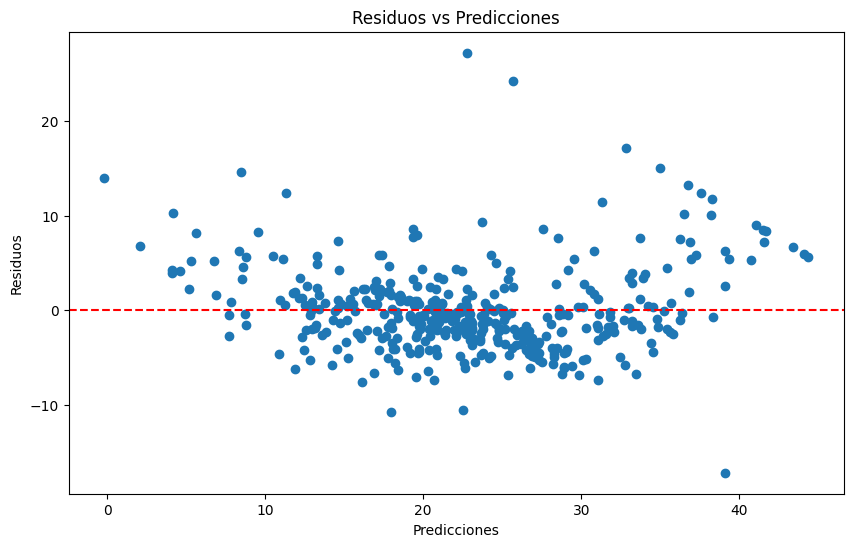

In [23]:
# Graficar los residuos contra las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(fitted_val, resid_val)
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en 0
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones')
plt.show()

---------------------

### **2. Independencia de los Errores**
- **Descripción:** Los errores (residuos) deben ser independientes entre sí.
- **Implicación:** La autocorrelación (dependencia entre errores) puede llevar a coeficientes estimados inexactos.
- **Cómo verificarlo:** 
  - Usar la estadística **Durbin-Watson** para detectar autocorrelación.
  - Implementar modelos específicos (e.g., ARIMA) si hay autocorrelación.

In [24]:
# Calcular la estadística Durbin-Watson
dw_stat = durbin_watson(resid_val)

print(f'Estadística Durbin-Watson: {dw_stat}')

Estadística Durbin-Watson: 2.1141228732155204


El valor de la estadística **Durbin-Watson** que obtuviste es **2.114**, lo cual está cerca de **2**. Esto indica que **no hay autocorrelación significativa** en los residuos de tu modelo.

### ¿Qué significa esto?
- **Autocorrelación** significa que los errores (o residuos) del modelo están relacionados entre sí. Si los residuos no son independientes, puede ser un indicio de que el modelo no está capturando completamente las relaciones entre las variables.
- La **estadística Durbin-Watson** mide esta relación y, si el valor está cerca de **2**, significa que los residuos son **independientes** entre sí, lo cual es ideal.

### Resumen:
- **Valor cercano a 2** (en tu caso, 2.114) sugiere que los errores de tu modelo son **independientes**.
- Esto es **bueno** porque indica que no hay patrones sistemáticos en los residuos, lo que significa que tu modelo está haciendo un buen trabajo al predecir sin sesgos en los errores.

Este resultado sugiere que puedes seguir adelante con tu modelo sin preocupaciones de autocorrelación en los residuos.

---------------------------

### **3. Homocedasticidad**
- **Descripción:** La varianza de los errores debe ser constante en todos los niveles de la variable dependiente.
- **Implicación:** Si no se cumple (heterocedasticidad), las pruebas de significancia pueden ser incorrectas.
- **Cómo verificarlo:** 
  - Graficar los residuos contra las predicciones (no debe haber patrones sistemáticos).
  - Usar pruebas como la de Breusch-Pagan o White.

La **homocedasticidad** es una condición clave en la regresión lineal que establece que la varianza de los errores debe ser constante en todos los niveles de la variable dependiente. Si esta condición no se cumple, es decir, si los residuos tienen una varianza que cambia con el valor de las predicciones (o de la variable dependiente), se dice que hay **heterocedasticidad**.

### Pasos para verificar la homocedasticidad:

1. **Graficar los residuos contra las predicciones**: Si la varianza de los residuos es constante, no deberías observar ningún patrón en el gráfico. Si los residuos se agrupan más cerca del cero en un rango de predicciones y se dispersan más ampliamente en otro, eso indica heterocedasticidad.

2. **Usar la prueba de Breusch-Pagan o White**: Son pruebas estadísticas que puedes usar para verificar la homocedasticidad de forma formal.

### Gráfico de residuos vs predicciones:

El código para este gráfico sería muy similar al gráfico de residuos vs predicciones que ya realizaste, solo que ahora, al observarlo, estarás buscando patrones de **dispersión** que sugieran heterocedasticidad.

In [25]:
X_train_const = sm.add_constant(X_train)

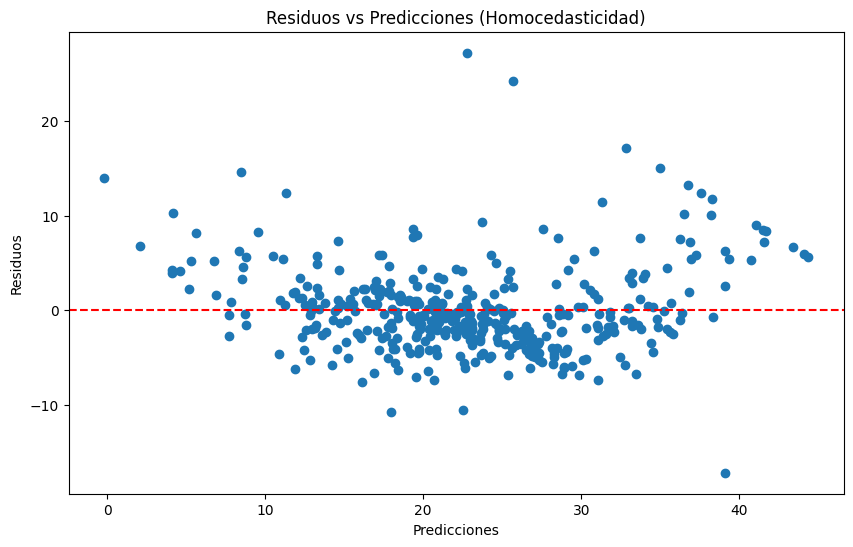

In [26]:
# Obtener las predicciones (valores ajustados) del modelo
predicciones = lin_reg.predict(X_train_const)

# Graficar residuos vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(predicciones, resid_val)
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en 0
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones (Homocedasticidad)')
plt.show()

### ¿Qué buscar en el gráfico?
- **Patrón aleatorio**: Si los residuos están distribuidos aleatoriamente alrededor de la línea horizontal en cero y tienen una dispersión constante, entonces no hay heterocedasticidad, y los residuos cumplen con la homocedasticidad.
- **Patrón en forma de embudo o abanico**: Si observas que los residuos se agrupan más cerca de cero en los valores bajos de las predicciones y se dispersan más a medida que aumentan las predicciones, esto indica **heterocedasticidad**.

### Prueba de Breusch-Pagan:

Para realizar una prueba estadística formal sobre la homocedasticidad, puedes usar la **prueba de Breusch-Pagan** disponible en `statsmodels`. Esta prueba evalúa si existe heterocedasticidad en los residuos.

In [27]:
# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(resid_val, X_train_const)

# Los resultados son: [estadística de prueba, valor p, valor de la estadística de LM, valor p de LM]
bp_test_statistic, bp_test_p_value, _, _ = bp_test

print(f'Estadística de prueba: {bp_test_statistic}')
print(f'Valor p: {bp_test_p_value}')

Estadística de prueba: 59.189086690910486
Valor p: 7.332519419034074e-08


El resultado de la prueba de **Breusch-Pagan** muestra lo siguiente:

- **Estadística de prueba**: 59.19
- **Valor p**: 7.33e-08

### Interpretación:
- El **valor p** es extremadamente pequeño (**7.33e-08**, o **0.0000000733**), lo que es mucho menor que el umbral común de **0.05**.
- Esto sugiere que **rechazamos la hipótesis nula** de **homocedasticidad**. En otras palabras, hay **heterocedasticidad** en los residuos.

### ¿Qué significa esto?
- La **heterocedasticidad** indica que la varianza de los errores no es constante a lo largo de los niveles de la variable dependiente. Esto puede afectar la validez de las inferencias y las pruebas de significancia en tu modelo de regresión lineal.
  
### ¿Qué hacer ahora?
- Dado que has detectado heterocedasticidad, puedes considerar **transformaciones** en las variables, como tomar logaritmos, o usar **modelos robustos** que ajusten los errores estándar para heterocedasticidad (por ejemplo, regresión con **errores estándar robustos**).

--------------------------

### **4. Normalidad de los Errores**
- **Descripción:** Los errores deben seguir una distribución normal.
- **Implicación:** Esto es crucial para realizar pruebas de hipótesis y construir intervalos de confianza precisos.
- **Cómo verificarlo:** 
  - Usar gráficos como histogramas, diagramas Q-Q o pruebas estadísticas (e.g., Jarque-Bera, Shapiro-Wilk).
  - Aplicar transformaciones si los residuos no son normales.

### **Normalidad de los Errores**
La **normalidad de los errores** es una suposición importante en la regresión lineal, especialmente cuando se realizan pruebas de hipótesis y se construyen intervalos de confianza. Si los residuos no siguen una distribución normal, los resultados de las pruebas de significancia pueden ser incorrectos.

### **¿Cómo verificar la normalidad de los errores?**
1. **Gráficos**:
   - **Histograma de los residuos**: Nos muestra cómo se distribuyen los errores.
   - **Diagrama Q-Q (Quantile-Quantile)**: Compara los cuantiles de los residuos con los de una distribución normal. Si los residuos siguen una distribución normal, los puntos deben alinearse con la línea recta.
   
2. **Pruebas estadísticas**:
   - **Prueba de Jarque-Bera**: Verifica si los residuos tienen una distribución normal. La hipótesis nula es que los residuos siguen una distribución normal.
   - **Prueba de Shapiro-Wilk**: Otra prueba para la normalidad de los residuos.

### **Código para realizar estas verificaciones**:

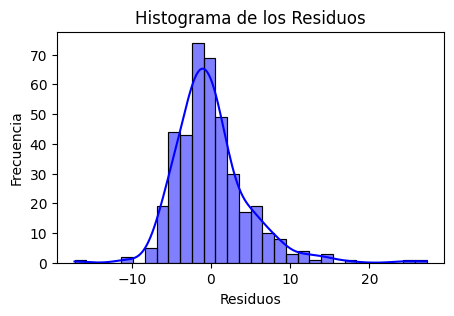

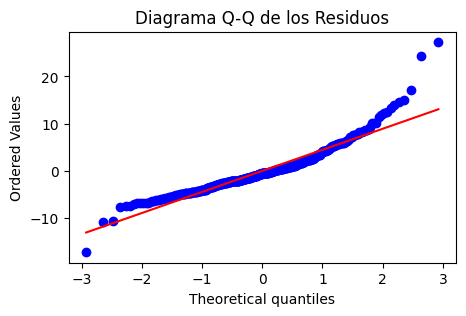

In [28]:
# 1. Histograma de los residuos
plt.figure(figsize=(5, 3))
sns.histplot(resid_val, kde=True, color='blue', bins=30)  # Histograma con la curva KDE
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# 2. Diagrama Q-Q
plt.figure(figsize=(5, 3))
stats.probplot(resid_val, dist="norm", plot=plt)  # Compara los residuos con una distribución normal
plt.title('Diagrama Q-Q de los Residuos')
plt.show()

In [29]:
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import shapiro

# 3. Prueba de Jarque-Bera
jb_stat, jb_p_value, skewness, kurtosis = jarque_bera(resid_val)  # Prueba de Jarque-Bera para normalidad
print(f"Estadística de Jarque-Bera: {jb_stat}")
print(f"Valor p de Jarque-Bera: {jb_p_value}")
print(f"Skewness (Sesgo): {skewness}")
print(f"Kurtosis: {kurtosis}")

print()

# 4. Prueba de Shapiro-Wilk
shapiro_stat, shapiro_p_value = shapiro(resid_val)  # Prueba de Shapiro-Wilk para normalidad
print(f"Estadística de Shapiro-Wilk: {shapiro_stat}")
print(f"Valor p de Shapiro-Wilk: {shapiro_p_value}")

Estadística de Jarque-Bera: 579.8165827773876
Valor p de Jarque-Bera: 1.2428788333280804e-126
Skewness (Sesgo): 1.378837436965844
Kurtosis: 8.180712186718141

Estadística de Shapiro-Wilk: 0.9117941526483859
Valor p de Shapiro-Wilk: 1.3222205573678351e-14


Los resultados que has obtenido de las pruebas **Jarque-Bera** y **Shapiro-Wilk** son bastante claros en cuanto a la normalidad de los residuos:

### **Prueba de Jarque-Bera**:
- **Estadística de Jarque-Bera**: 579.82
- **Valor p de Jarque-Bera**: \(1.24 \times 10^{-126}\) (un valor extremadamente bajo)

**Interpretación**: Dado que el valor p es mucho menor que 0.05, **rechazamos la hipótesis nula de normalidad**, lo que sugiere que los residuos no siguen una distribución normal.

- **Skewness (Sesgo)**: 1.38 (indica que los residuos están **asimétricos** hacia la derecha, es decir, tienen una cola más larga en el lado derecho de la distribución).
- **Kurtosis**: 8.18 (indica que la distribución tiene **colas más gruesas** que una distribución normal, lo que sugiere que hay más valores extremos en los residuos de lo que sería esperado en una distribución normal).

### **Prueba de Shapiro-Wilk**:
- **Estadística de Shapiro-Wilk**: 0.91
- **Valor p de Shapiro-Wilk**: \(1.32 \times 10^{-14}\) (también extremadamente bajo)

**Interpretación**: El valor p de la prueba de Shapiro-Wilk también es menor que 0.05, lo que nos lleva a **rechazar la hipótesis nula de normalidad**. Esto refuerza la conclusión de que los residuos no siguen una distribución normal.

### **Resumen**:
Ambas pruebas indican que los residuos no son normales, ya que los valores p son extremadamente bajos. Además, la prueba de Jarque-Bera muestra que hay una **asimetría** (sesgo) en la distribución de los residuos y una **alta curtosis**, lo que sugiere que la distribución tiene más valores extremos de los que serían esperados en una distribución normal.

----------------------

### **5. No Multicolinealidad**
- **Descripción:** Las variables independientes no deben estar altamente correlacionadas entre sí.
- **Implicación:** La multicolinealidad dificulta estimar de manera confiable los coeficientes y afecta la estabilidad del modelo.
- **Cómo verificarlo:** 
  - Calcular el **Factor de Inflación de la Varianza (VIF)** para identificar correlaciones.
  - Eliminar o combinar variables correlacionadas si el VIF es alto.

La **multicolinealidad** ocurre cuando las variables independientes están altamente correlacionadas entre sí, lo que puede dificultar la interpretación de los coeficientes de regresión y afectar la estabilidad del modelo.

A continuación, te proporciono un código para calcular el **Factor de Inflación de la Varianza (VIF)**, que es una métrica comúnmente utilizada para detectar multicolinealidad. Además, el código incluye comentarios explicativos.

### Código para calcular el VIF:

In [30]:
# Crear un DataFrame con las variables independientes
# Excluir la constante (intercepto) del análisis de VIF
X_vif = X_constant.iloc[:, 1:]  # Eliminamos la columna de la constante

# Crear un DataFrame para almacenar los resultados del VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns  # Nombres de las variables independientes
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Mostrar los resultados
print(vif_data)

   Variable        VIF
0      CRIM   1.987996
1        ZN   3.075814
2     INDUS  13.741418
3      CHAS   1.181392
4       NOX  74.807051
5        RM  77.536575
6       AGE  20.885660
7       DIS  15.299778
8       RAD  15.204351
9       TAX  60.960907
10  PTRATIO  81.228153
11        B  19.703235
12    LSTAT  10.597205


### **Análisis de los Resultados del VIF**

Los valores de VIF calculados indican la magnitud de la multicolinealidad en las variables independientes del modelo. Aquí está el análisis detallado:

#### **Interpretación General**:
- **VIF < 5**: La variable tiene baja o moderada correlación con las demás y no representa un problema.
- **VIF entre 5 y 10**: Hay multicolinealidad significativa, pero podría ser manejable dependiendo del contexto.
- **VIF > 10**: Indica alta multicolinealidad, lo que significa que las variables están altamente correlacionadas entre sí, y podría afectar negativamente al modelo.

#### **Variables Problemáticas**:
1. **NOX (74.8)**, **RM (77.5)**, **PTRATIO (81.2)**, y **TAX (60.9)** tienen **VIF muy altos (> 10)**:
   - Estas variables presentan una fuerte multicolinealidad con otras variables del modelo.
   - Esto sugiere que estas características pueden estar proporcionando información redundante.

2. **AGE (20.9)**, **DIS (15.3)**, **RAD (15.2)**, y **LSTAT (10.6)**:
   - Estas variables tienen **VIF altos (> 10)**, lo que indica que también podrían estar contribuyendo al problema de multicolinealidad.

3. **INDUS (13.7)**:
   - Presenta una multicolinealidad significativa pero no tan extrema como las anteriores.

#### **Variables con VIF aceptables (< 5)**:
- **CRIM (1.99)**, **ZN (3.07)**, **CHAS (1.18)**:
   - Estas variables no presentan un problema de multicolinealidad y no requieren acciones inmediatas.

### **Recomendaciones**:
1. **Eliminar variables con VIF muy alto**:
   - Considera eliminar variables como **PTRATIO**, **RM**, **TAX**, o **NOX** que tienen los valores de VIF más extremos. Sin embargo, la selección específica debe basarse en la importancia de las variables para el modelo y el dominio del problema.

2. **Realizar una combinación de variables**:
   - Variables como **TAX** y **RAD** podrían combinarse en una nueva característica si tienen una relación lógica.

3. **Usar métodos de regularización**:
   - Técnicas como **Ridge Regression** o **Lasso Regression** son efectivas para manejar multicolinealidad al penalizar los coeficientes de las variables correlacionadas.

4. **Análisis adicional**:
   - Antes de eliminar variables, verifica su **significancia estadística** (p-valores) y su impacto en el rendimiento del modelo.

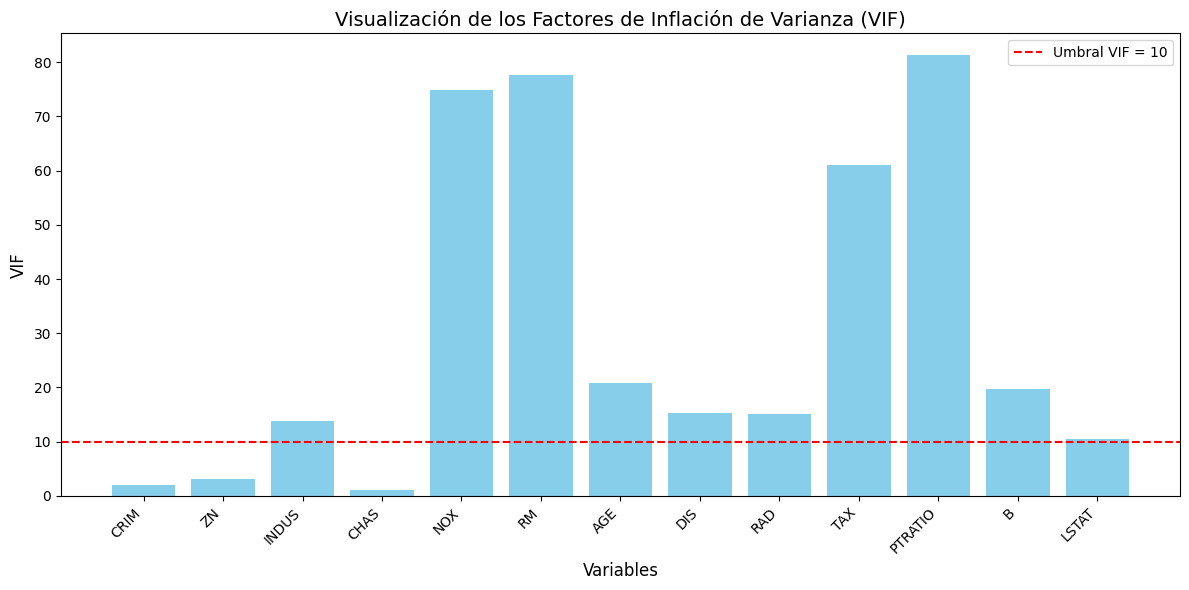

In [31]:
# Crear un gráfico de barras para los valores de VIF
plt.figure(figsize=(12, 6))
plt.bar(vif_data["Variable"], vif_data["VIF"], color='skyblue')

# Añadir etiquetas y título
plt.xlabel("Variables", fontsize=12)
plt.ylabel("VIF", fontsize=12)
plt.title("Visualización de los Factores de Inflación de Varianza (VIF)", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas de las variables para legibilidad
plt.axhline(y=10, color='red', linestyle='--', label='Umbral VIF = 10')  # Línea para el umbral de VIF
plt.legend()
plt.tight_layout()
plt.show()


---

### **6. Ausencia de Errores en las Variables**
- **Descripción:** Las variables independientes deben medirse sin errores significativos.
- **Implicación:** Los errores de medición pueden sesgar los coeficientes.
- **Cómo manejarlo:** 
  - Usar variables proxy o técnicas avanzadas como **regresión instrumental**.

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.609125   11.569307   10.985050    0.071782    0.556484    6.315891   
std      8.875058   23.152481    6.894618    0.258447    0.117704    0.709452   
min      0.009060    0.000000    0.740000    0.000000    0.385000    3.863000   
25%      0.081437    0.000000    5.130000    0.000000    0.452000    5.890500   
50%      0.261390    0.000000    8.560000    0.000000    0.538000    6.210000   
75%      3.202962   20.000000   18.100000    0.000000    0.631000    6.636750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    68.556436    3.808195    9.356436  404.032178   18.318317  356.278342   
std     27.994922    2.1312

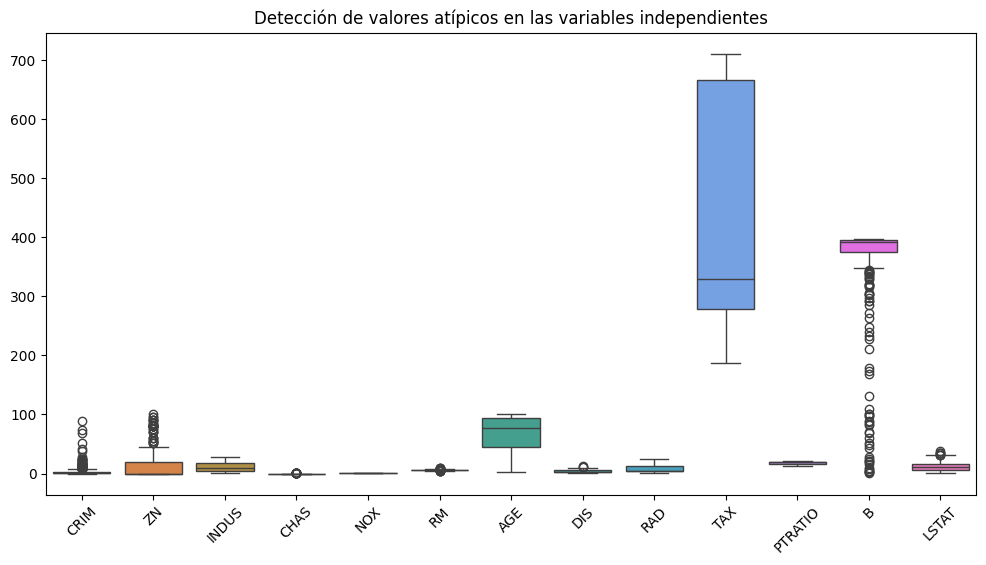

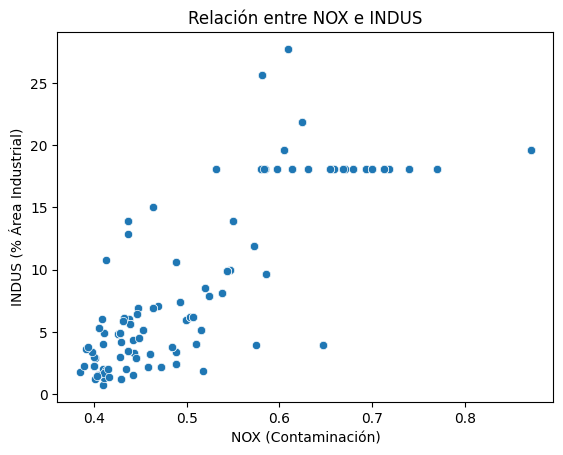

In [32]:
# 1. Revisar estadísticas básicas para identificar datos atípicos
print(X_train.describe())

# 2. Detectar valores atípicos con un diagrama de caja (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=45)
plt.title("Detección de valores atípicos en las variables independientes")
plt.show()

# 3. Verificar correlaciones con variables proxy (si existen)
# Por ejemplo, comparar NOX (contaminación) con INDUS (% de área industrial)
sns.scatterplot(x=X_train['NOX'], y=X_train['INDUS'])
plt.xlabel("NOX (Contaminación)")
plt.ylabel("INDUS (% Área Industrial)")
plt.title("Relación entre NOX e INDUS")
plt.show()


### **Análisis Breve de los Resultados**

1. **Rangos amplios en las variables**:
   - Varias variables como `CRIM` (tasa de criminalidad) y `ZN` (proporción de zonas residenciales) tienen rangos muy amplios, desde valores cercanos a 0 hasta valores muy grandes (`CRIM` llega a 88.98). Esto podría indicar la necesidad de escalar o transformar estas variables antes de construir modelos.

2. **Distribuciones sesgadas**:
   - Las variables `CRIM`, `ZN`, `AGE`, y `LSTAT` parecen estar sesgadas, ya que su media está significativamente alejada de la mediana (50%). Por ejemplo, la mediana de `CRIM` es 0.26, pero su media es 3.61.

3. **Proporción binaria en `CHAS`**:
   - La variable `CHAS` (ubicación junto al río Charles) es binaria, con valores de 0 y 1. Esto explica la media baja (0.0717), ya que solo una pequeña proporción de las observaciones tiene valor 1.

4. **Varianza alta en algunas variables**:
   - Variables como `NOX` (concentración de óxidos de nitrógeno) y `RM` (número promedio de habitaciones) tienen desviaciones estándar relativamente pequeñas, lo que indica menor variabilidad en comparación con otras como `CRIM`, `ZN`, o `AGE`.

5. **Potenciales datos atípicos**:
   - La variable `DIS` (distancia ponderada a centros de empleo) tiene un máximo mucho mayor que su tercer cuartil (12.12 frente a 5.40), lo que sugiere posibles datos atípicos.
   - Lo mismo ocurre con `LSTAT` (porcentaje de población con bajo estatus económico), cuyo máximo (37.97) es significativamente mayor que el tercer cuartil (16.37).

6. **Multicolinealidad potencial**:
   - La alta variabilidad en algunas variables, como `TAX` (impuesto sobre la propiedad) y `PTRATIO` (proporción alumno-profesor), puede reflejar correlaciones altas con otras variables. Esto se debe verificar con análisis como el **VIF**.

7. **Consideración para transformación**:
   - Variables como `CRIM` y `LSTAT`, que son positivamente sesgadas y tienen valores extremos, podrían beneficiarse de transformaciones logarítmicas o de otro tipo para mejorar la distribución.

In [33]:
# Especificar las variables
y = y_train  # Variable dependiente
X = X_train[['TAX', 'RAD']]  # Variables independientes problemáticas
Z = X_train[['DIS']]  # Instrumento

# Ajustar el modelo IV
iv_model = IV2SLS(dependent=y, exog=X.drop('TAX', axis=1), endog=X['TAX'], instruments=Z).fit()
print(iv_model.summary)


                          IV-2SLS Estimation Summary                          
Dep. Variable:                   MEDV   R-squared:                      0.7004
Estimator:                    IV-2SLS   Adj. R-squared:                 0.6989
No. Observations:                 404   F-statistic:                    1518.6
Date:                Wed, Jan 01 2025   P-value (F-stat)                0.0000
Time:                        13:05:11   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
RAD           -2.6579     0.1352    -19.653     0.0000     -2.9229     -2.3928
TAX            0.1202     0.0043     28.119     0.00



---

### **Importancia de las Suposiciones**
Cumplir estas suposiciones es esencial para que:
1. **Los coeficientes sean imparciales y eficientes:** Esto asegura que los estimadores reflejan fielmente las relaciones subyacentes en los datos.
2. **Las inferencias sean válidas:** Las pruebas estadísticas (valores p, intervalos de confianza) son precisas solo si las suposiciones se cumplen.
3. **El modelo sea interpretable y útil:** Si las suposiciones fallan, puede ser necesario un modelo más complejo o un enfoque diferente (e.g., regresión no lineal).

---

### **Análisis de la Importancia de las Suposiciones**

1. **Coeficientes imparciales y eficientes**:  
   - **Significado**: Si las suposiciones se cumplen, los coeficientes estimados reflejan la verdadera relación entre las variables independientes y la dependiente. Esto es clave para evitar sesgos en los resultados. Por ejemplo, en este análisis, saber que `RAD` tiene un impacto negativo y significativo depende de que no haya problemas como multicolinealidad o errores en las variables.  

2. **Inferencias válidas**:  
   - **Significado**: Las pruebas estadísticas, como los valores p y los intervalos de confianza, son confiables solo si las suposiciones (e.g., normalidad de los errores, homocedasticidad) se mantienen. Si fallan, podríamos aceptar o rechazar hipótesis incorrectamente. En nuestro caso, problemas como la heterocedasticidad o la no normalidad de los errores podrían haber afectado estas inferencias.  

3. **Modelo interpretable y útil**:  
   - **Significado**: Cumplir las suposiciones garantiza que el modelo sea aplicable en escenarios reales y que las conclusiones sean válidas. Si las suposiciones fallan, el modelo podría requerir transformaciones (logaritmos, polinomios) o técnicas alternativas (e.g., modelos no paramétricos o regresiones robustas).  

### **Implicaciones en el caso actual**:
- Hemos detectado problemas como **multicolinealidad** y **no normalidad de los residuos**, que pueden afectar la precisión del modelo. Aunque el modelo tiene un buen ajuste general (R² = 0.70), sería prudente corregir estos problemas antes de realizar predicciones o decisiones basadas en el modelo. Esto podría incluir eliminar variables redundantes o probar transformaciones en los datos.

---
---

# Eliminar Outliers de la variable Dependiente

## Tecnica de "Filtrado basado en límites" o "Recorte por regla empírica"

In [34]:
# # Calculamos los límites superior e inferior para identificar valores atípicos en y_train.
# # Estos límites están definidos como 3 desviaciones estándar por encima o por debajo de la media.
# p3 = y_train.mean() + 3 * y_train.std()  # Límite superior
# p1 = y_train.mean() - 3 * y_train.std()  # Límite inferior

# # Mostramos los valores máximo y mínimo permitidos para y_train en español.
# print('Máximo permitido:', p3)
# print('Mínimo permitido:', p1)

# # Filtrar los valores de X_train y y_train que están dentro de los límites permitidos
# # Creamos una máscara booleana que verifica si los valores de y_train están dentro del rango permitido
# mask = (y_train <= p3) & (y_train >= p1)

# # Aplicamos la máscara para filtrar X_train y y_train
# X_train_filtrado = X_train[mask].copy()
# y_train_filtrado = y_train[mask].copy()

# # Asignamos los valores filtrados a las variables originales
# X_train = X_train_filtrado
# y_train = y_train_filtrado

# # Mostramos los valores que quedaron en X_train después de filtrar
# print("Valores restantes en X_train después de filtrar:")
# X_train

### `Nota Importante`:
No puedo usar la técnica de "Filtrado basado en límites" o "Recorte por regla empírica" en este caso porque los límites calculados, especialmente el valor mínimo (-5.199906822669341), no tienen sentido en el contexto del problema. Estoy trabajando con precios de casas, y un precio negativo es completamente irreal. Este problema ocurre porque esta técnica se basa en la media y la desviación estándar, que son muy sensibles a valores extremos o distribuciones asimétricas, lo que distorsiona los límites. Por ello, necesito optar por métodos más robustos, como el uso de percentiles o el rango intercuartil, que sean menos afectados por datos atípicos y reflejen mejor la realidad de los datos.

---

### 1. **Usar percentiles en lugar de desviaciones estándar**
Los percentiles son menos sensibles a los valores extremos y permiten definir límites basados en la distribución real de los datos. Por ejemplo, puedes eliminar valores por debajo del percentil 1 y por encima del percentil 99.

### Código con Percentiles

In [35]:
# # Calcular límites superior e inferior usando percentiles
# p1 = y_train.quantile(0.01)  # Percentil 1
# p3 = y_train.quantile(0.99)  # Percentil 99

# # Mostramos los límites calculados
# print('Máximo permitido (percentil 99):', p3)
# print('Mínimo permitido (percentil 1):', p1)

# # Crear la máscara para filtrar los datos
# mask = (y_train <= p3) & (y_train >= p1)

# # Aplicar la máscara para filtrar X_train y y_train
# X_train = X_train[mask]
# y_train = y_train[mask]

# # Mostrar los valores restantes en y_train después de filtrar
# print("Valores restantes en y_train después de filtrar:")
# print(y_train)

### 2. **Usar métodos de detección robusta de valores atípicos**
Otro enfoque es usar métodos estadísticos robustos como el rango intercuartil (IQR). Este método identifica valores atípicos que están muy lejos del rango entre el primer cuartil (Q1) y el tercer cuartil (Q3).

### Código con Rango Intercuartil (IQR)

In [36]:
# Calcular el rango intercuartil (IQR)
Q1 = y_train.quantile(0.25)  # Primer cuartil
Q3 = y_train.quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1

# Definir límites como 1.5 veces el IQR por encima y por debajo de Q3 y Q1, respectivamente
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mostramos los límites calculados
print('Máximo permitido (IQR):', upper_bound)
print('Mínimo permitido (IQR):', lower_bound)

# Crear la máscara para filtrar los datos
mask = (y_train <= upper_bound) & (y_train >= lower_bound)

# Aplicar la máscara para filtrar X_train y y_train
X_train = X_train[mask]
y_train = y_train[mask]

# Mostrar los valores restantes en y_train después de filtrar
print("Valores restantes en y_train después de filtrar:")
y_train

Máximo permitido (IQR): 40.574999999999996
Mínimo permitido (IQR): 2.7750000000000004
Valores restantes en y_train después de filtrar:


477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 378, dtype: float64

### Comparación entre los Métodos

| **Método**             | **Ventajas**                                             | **Desventajas**                                           |
|-------------------------|---------------------------------------------------------|----------------------------------------------------------|
| Desviaciones estándar   | Fácil de implementar y entender.                        | Sensible a valores extremos.                            |
| Percentiles             | Robusto contra valores extremos.                        | Puede eliminar demasiados datos si la distribución es asimétrica. |
| Rango intercuartil (IQR) | Robusto y ampliamente usado en la detección de valores atípicos. | Puede eliminar valores válidos en distribuciones muy asimétricas. |

---

### Recomendación
- Si la distribución de `y_train` es simétrica, **usar percentiles** es una buena opción.
- Si la distribución es asimétrica o contiene muchos valores atípicos, opta por **IQR**.
- Una vez aplicado cualquiera de estos métodos, verifica las estadísticas básicas (`describe()`) y gráficas como histogramas para confirmar que los datos restantes tienen sentido.

In [37]:
X_train.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199759  0.401095 -0.053341  0.395930 -0.191628  0.339361   
ZN      -0.199759  1.000000 -0.534983 -0.063763 -0.526764  0.315160 -0.575126   
INDUS    0.401095 -0.534983  1.000000  0.073678  0.778778 -0.418479  0.635439   
CHAS    -0.053341 -0.063763  0.073678  1.000000  0.146898  0.060388  0.085391   
NOX      0.395930 -0.526764  0.778778  0.146898  1.000000 -0.332844  0.716234   
RM      -0.191628  0.315160 -0.418479  0.060388 -0.332844  1.000000 -0.250380   
AGE      0.339361 -0.575126  0.635439  0.085391  0.716234 -0.250380  1.000000   
DIS     -0.374911  0.692632 -0.722461 -0.106666 -0.773094  0.268681 -0.751805   
RAD      0.617823 -0.308743  0.591515  0.001518  0.591684 -0.170663  0.431135   
TAX      0.577389 -0.287016  0.695869 -0.022109  0.652540 -0.247218  0.471527   
PTRATIO  0.283832 -0.391806  0.348055 -0.103746  0.167509 -0.234424  0.270896   
B       -0.353578  0.180788 -0.368743  0.031892 -0.371077  0.086409 -0.272882   
LSTAT    0.416491 -0.421269  0.641378 -0.007694  0.621967 -0.591562  0.623400   

              DIS       RAD       TAX   PTRATIO         B     LSTAT  
CRIM    -0.374911  0.617823  0.577389  0.283832 -0.353578  0.416491  
ZN       0.692632 -0.308743 -0.287016 -0.391806  0.180788 -0.421269  
INDUS   -0.722461  0.591515  0.695869  0.348055 -0.368743  0.641378  
CHAS    -0.106666  0.001518 -0.022109 -0.103746  0.031892 -0.007694  
NOX     -0.773094  0.591684  0.652540  0.167509 -0.371077  0.621967  
RM       0.268681 -0.170663 -0.247218 -0.234424  0.086409 -0.591562  
AGE     -0.751805  0.431135  0.471527  0.270896 -0.272882  0.623400  
DIS      1.000000 -0.488308 -0.531396 -0.254709  0.302656 -0.555204  
RAD     -0.488308  1.000000  0.913406  0.461484 -0.445036  0.502122  
TAX     -0.531396  0.913406  1.000000  0.428821 -0.446966  0.549868  
PTRATIO -0.254709  0.461484  0.428821  1.000000 -0.165300  0.324008  
B        0.302656 -0.445036 -0.446966 -0.165300  1.000000 -0.334529  
LSTAT   -0.555204  0.502122  0.549868  0.324008 -0.334529  1.000000

In [38]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 378, dtype: float64

### Multicolinealidad

In [39]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Agregar constante a las variables independientes
X_train_const = add_constant(X_train)

# Calcular el VIF para cada variable
vif = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

# Crear un DataFrame con los valores de VIF y las variables correspondientes
vif_df = pd.DataFrame({"VIF": vif[1:]}, index=X_train_const.columns[1:])

# Mostrar los resultados
vif_df.T

CRIM        ZN     INDUS      CHAS      NOX        RM       AGE  \
VIF  1.715254  2.501699  3.912329  1.080382  4.51873  1.847911  3.049095   

         DIS       RAD       TAX   PTRATIO         B     LSTAT  
VIF  4.22345  7.628438  8.722123  1.713424  1.326428  2.937368

In [40]:
pd.concat([X_train[["TAX", "RAD"]], y_train], axis=1).corr()

TAX       RAD      MEDV
TAX   1.000000  0.913406 -0.593455
RAD   0.913406  1.000000 -0.520124
MEDV -0.593455 -0.520124  1.000000

In [41]:
X_train = X_train.drop('TAX', axis=1)
X_train

CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD  PTRATIO  \
477  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24     20.2   
15    0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4     21.0   
332   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1     16.9   
423   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24     20.2   
19    0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965    4     21.0   
..        ...   ...    ...   ...     ...    ...   ...     ...  ...      ...   
106   0.17120   0.0   8.56     0  0.5200  5.836  91.9  2.2110    5     20.9   
270   0.29916  20.0   6.96     0  0.4640  5.856  42.1  4.4290    3     18.6   
348   0.01501  80.0   2.01     0  0.4350  6.635  29.7  8.3440    4     17.0   
435  11.16040   0.0  18.10     0  0.7400  6.629  94.6  2.1247   24     20.2   
102   0.22876   0.0   8.56     0  0.5200  6.405  85.4  2.7147    5     20.9   

          B  LSTAT  
477  349.48  24.91  
15   395.62   8.47  
332  362.25   7.83  
423    2.52  23.29  
19   390.95  11.28  
..      ...    ...  
106  395.67  18.66  
270  388.65  13.00  
348  390.94   5.99  
435  109.85  23.27  
102   70.80  10.63  

[378 rows x 12 columns]

In [42]:
import statsmodels.api as sm

# Agregar constante a X_train
X_constante = sm.add_constant(X_train)

# Crear el modelo de regresión lineal
lin_reg_2 = sm.OLS(y_train, X_constante)

# Ajustar el modelo
resultados = lin_reg_2.fit()

# Obtener el resumen del modelo
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     101.9
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          1.58e-108
Time:                        13:05:11   Log-Likelihood:                -990.70
No. Observations:                 378   AIC:                             2007.
Df Residuals:                     365   BIC:                             2059.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0431      4.268      7.273      0.0

In [43]:
# Obtener los residuos y valores ajustados del modelo ajustado
resid_val = resultados.resid
fitted_val = resultados.fittedvalues

# Calcular la media de los residuos
mean_resid = resid_val.mean()
print("Media de los residuos:", mean_resid)


Media de los residuos: -8.576326010331898e-15


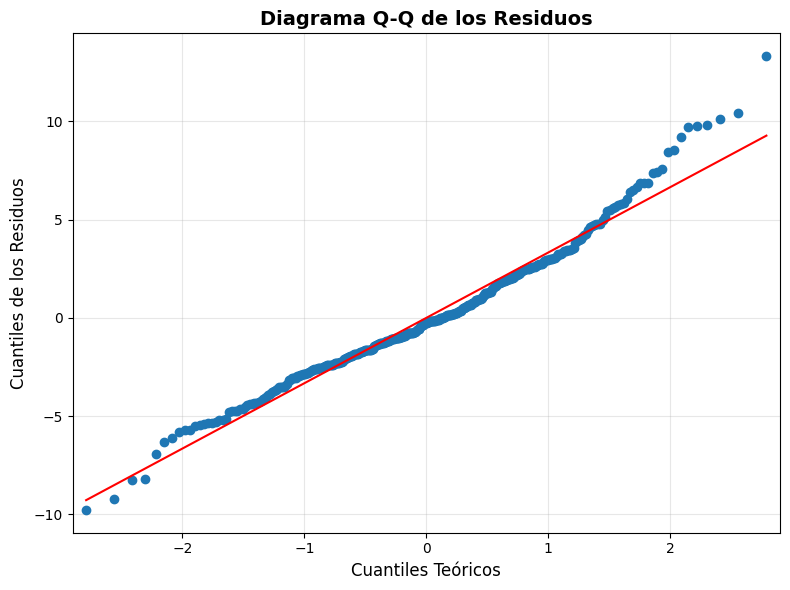

In [44]:
# Graficar el diagrama Q-Q
plt.figure(figsize=(8, 6))
sm.qqplot(resid_val, line='s', ax=plt.gca())

# Personalización del gráfico
plt.title("Diagrama Q-Q de los Residuos", fontsize=14, fontweight='bold')
plt.xlabel("Cuantiles Teóricos", fontsize=12)
plt.ylabel("Cuantiles de los Residuos", fontsize=12)
plt.grid(alpha=0.3)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [45]:
# Calcular el test de Shapiro-Wilk para los residuos
shapiro_test = stats.shapiro(resultados.resid)

# Mostrar los resultados del test
print("Estadístico de Shapiro-Wilk:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)


Estadístico de Shapiro-Wilk: 0.9760141715086548
Valor p: 6.519059456286132e-06


Text(0.5, 1.0, 'fitted vs Observed')

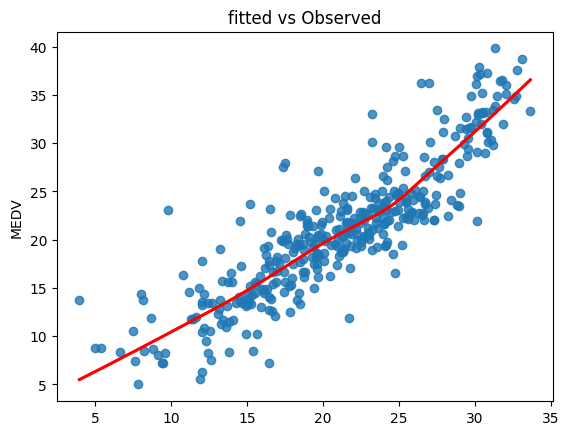

In [46]:
sns.regplot(x=fitted_val, y=y_train, lowess=True, line_kws={"color": "red"})
plt.title('fitted vs Observed')

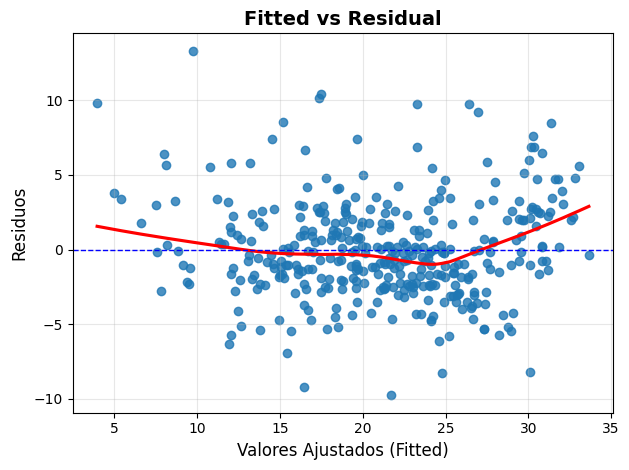

In [50]:
sns.regplot(x=fitted_val, y=resid_val, lowess=True, line_kws={'color': 'red'})
plt.title('Fitted vs Residual', fontsize=14, fontweight='bold')
plt.xlabel('Valores Ajustados (Fitted)', fontsize=12)
plt.ylabel('Residuos', fontsize=12)
plt.axhline(0, color='blue', linestyle='--', linewidth=1)  # Línea horizontal en 0
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

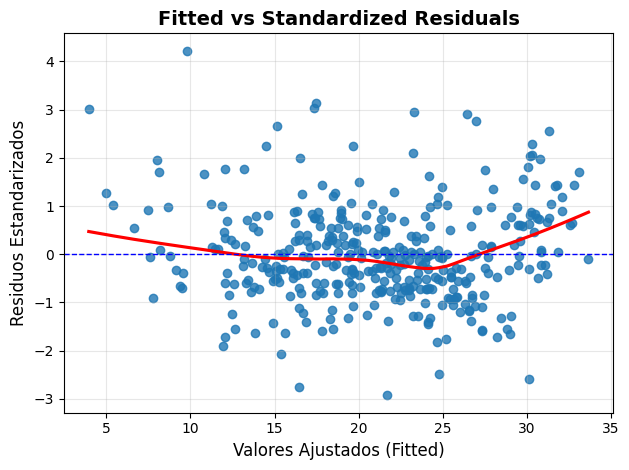

In [52]:
# Obtener los residuos estandarizados
resid_standar = resultados.get_influence().resid_studentized_internal

# Graficar residuos estandarizados vs valores ajustados

sns.regplot(x=fitted_val, y=resid_standar, lowess=True, line_kws={'color': 'red'})
plt.title('Fitted vs Standardized Residuals', fontsize=14, fontweight='bold')
plt.xlabel('Valores Ajustados (Fitted)', fontsize=12)
plt.ylabel('Residuos Estandarizados', fontsize=12)
plt.axhline(0, color='blue', linestyle='--', linewidth=1)  # Línea horizontal en 0
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
